# Group of Legends: Final Project Milestone 3
## Course: BUA 600

## Group Members:
* Karen Jolley
* Renata Martins
* Stephen Skeels
* Juan Ventosa
* Adam Vuolo

## About the Data:

#### Context
League of Legends is a multiplayer online battle arena strategy game where 2 teams of five players face off to destroy the other's base.  Each match is 45-60 minutes long and wins increase a player's rank, while losses decrease their rank. Player rankings have 9 levels.

#### Content
This dataset contains the statistics from both teams (blue and red) taken at the 10-minute mark of a match. There are 9,879 records representing unique games played by players ranked in the DIAMOND to MASTER level (6-7 level where level 9 is the highest rank). Players in these ranks are considered to have roughly the same level of skill.

Each row is uniquely identified by a gameID with 19 features per team (38 in total) and a "blueWins" column where a value of 1 means the blue team has won; 0 otherwise.

## Project Objective:
It is our hypothesis that the win-loss outcome of a League of Legends game among DIAMOND/MASTER ranked players can be predicted based on key performance indicators taken at the 10-minute mark of a match. Through the use of descriptive and predictive analysis, success will be measured by achieving a greater than 70% accuracy at correctly determining the win/loss outcome of a match at the 10-minute mark of a game. 

## LOADING, INSPECTING AND CLEANING THE DATA
#### Load the necessary modules:

In [1]:
# Load pandas, numpy, and mathplotlib modules.  Include IPython.display function.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sn

from IPython.display import display
pd.options.display.max_columns = None

#### Load the data.
Note: This public data originated from https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min.  A copy of the dataset's raw files were stored on a github repository and made available to the public.  This allows for easy access for the data to be loaded in jupyter notebooks using the pandas.read_csv function.

In [2]:
# Load the data stored at a public github repository
LoL_df = pd.read_csv("https://raw.githubusercontent.com/jcventosa/BUA600/main/high_diamond_ranked_10min.csv")

In [3]:
# Examine the first 5 rows of data
LoL_df= pd.DataFrame(LoL_df)
LoL_df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


#### Inspect the data for null or missing values.

In [4]:
# Check data for missing or null values by column names
LoL_df.count()

gameId                          9879
blueWins                        9879
blueWardsPlaced                 9879
blueWardsDestroyed              9879
blueFirstBlood                  9879
blueKills                       9879
blueDeaths                      9879
blueAssists                     9879
blueEliteMonsters               9879
blueDragons                     9879
blueHeralds                     9879
blueTowersDestroyed             9879
blueTotalGold                   9879
blueAvgLevel                    9879
blueTotalExperience             9879
blueTotalMinionsKilled          9879
blueTotalJungleMinionsKilled    9879
blueGoldDiff                    9879
blueExperienceDiff              9879
blueCSPerMin                    9879
blueGoldPerMin                  9879
redWardsPlaced                  9879
redWardsDestroyed               9879
redFirstBlood                   9879
redKills                        9879
redDeaths                       9879
redAssists                      9879
r

In [5]:
# Check the data types
LoL_df.dtypes

gameId                            int64
blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64


Initial inspection revealed no missing values with all features containing 9879 values. All data types have also been correctly formatted as an integer or a float. Note: The gameId column is a unique identifier for each row and can be formatted as an integer or a string.  No change will be made to gameId at this time.

## Exploratory Data Analysis

To better visualize the comparison between blue team and red team stats, data frame columns will be resorted to adjacently place similar stats together.

In [6]:
# Resort the LoL_df to adjacently place same blue and red features together and save it to new data frame.
LoL_Blue_Red_Comp = LoL_df[["gameId","blueWins", "blueWardsPlaced", "redWardsPlaced", "blueWardsDestroyed","redWardsDestroyed",
                 "blueFirstBlood", "redFirstBlood", "blueKills", "redKills", "blueDeaths", "redDeaths",
                 "blueAssists", "redAssists", "blueEliteMonsters", "redEliteMonsters", "blueDragons", "redDragons",
                 "blueHeralds", "redHeralds", "blueTowersDestroyed", "redTowersDestroyed", "blueTotalGold",
                 "redTotalGold", "blueAvgLevel", "redAvgLevel", "blueTotalExperience", "redTotalExperience",
                 "blueTotalMinionsKilled", "redTotalMinionsKilled", "blueTotalJungleMinionsKilled", 
                 "redTotalJungleMinionsKilled","blueGoldDiff", "redGoldDiff", "blueExperienceDiff", 
                 "redExperienceDiff", "blueCSPerMin","redCSPerMin", "blueGoldPerMin", "redGoldPerMin"]]

#### Inspect the stats for each attribute except gameId
To display all columns in the output, this will be done in five parts.

In [7]:
# Show numeric stats for first 9 columns (exclude first column of gameid)
LoL_Blue_Red_Comp.iloc[:,1:10].describe()

,blueWins,blueWardsPlaced,redWardsPlaced,blueWardsDestroyed,redWardsDestroyed,blueFirstBlood,redFirstBlood,blueKills,redKills
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,22.367952,2.824881,2.723150,0.504808,0.495192,6.183925,6.137666
std,0.500024,18.019177,18.457427,2.174998,2.138356,0.500002,0.500002,3.011028,2.933818
min,0.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,14.000000,14.000000,1.000000,1.000000,0.000000,0.000000,4.000000,4.000000
50%,0.000000,16.000000,16.000000,3.000000,2.000000,1.000000,0.000000,6.000000,6.000000
75%,1.000000,20.000000,20.000000,4.000000,4.000000,1.000000,1.000000,8.000000,8.000000
max,1.000000,250.000000,276.000000,27.000000,24.000000,1.000000,1.000000,22.000000,22.000000


In [8]:
# Show numeric stats for columns 10-19
LoL_Blue_Red_Comp.iloc[:,10:20].describe()

,blueDeaths,redDeaths,blueAssists,redAssists,blueEliteMonsters,redEliteMonsters,blueDragons,redDragons,blueHeralds,redHeralds
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,6.137666,6.183925,6.645106,6.662112,0.549954,0.573135,0.361980,0.413098,0.187974,0.160036
std,2.933818,3.011028,4.064520,4.060612,0.625527,0.626482,0.480597,0.492415,0.390712,0.366658
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,8.000000,9.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,22.000000,22.000000,29.000000,28.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Show numeric stats for columns 20-27
LoL_Blue_Red_Comp.iloc[:,20:28].describe()

,blueTowersDestroyed,redTowersDestroyed,blueTotalGold,redTotalGold,blueAvgLevel,redAvgLevel,blueTotalExperience,redTotalExperience
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.051422,0.043021,16503.455512,16489.041401,6.916004,6.925316,17928.110133,17961.730438
std,0.244369,0.216900,1535.446636,1490.888406,0.305146,0.305311,1200.523764,1198.583912
min,0.000000,0.000000,10730.000000,11212.000000,4.600000,4.800000,10098.000000,10465.000000
25%,0.000000,0.000000,15415.500000,15427.500000,6.800000,6.800000,17168.000000,17209.500000
50%,0.000000,0.000000,16398.000000,16378.000000,7.000000,7.000000,17951.000000,17974.000000
75%,0.000000,0.000000,17459.000000,17418.500000,7.200000,7.200000,18724.000000,18764.500000
max,4.000000,2.000000,23701.000000,22732.000000,8.000000,8.200000,22224.000000,22269.000000


In [10]:
# Show numeric stats for columns 28-33
LoL_Blue_Red_Comp.iloc[:,28:34].describe()

,blueTotalMinionsKilled,redTotalMinionsKilled,blueTotalJungleMinionsKilled,redTotalJungleMinionsKilled,blueGoldDiff,redGoldDiff
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,216.699565,217.349226,50.509667,51.313088,14.414111,-14.414111
std,21.858437,21.911668,9.898282,10.027885,2453.349179,2453.349179
min,90.000000,107.000000,0.000000,4.000000,-10830.000000,-11467.000000
25%,202.000000,203.000000,44.000000,44.000000,-1585.500000,-1596.000000
50%,218.000000,218.000000,50.000000,51.000000,14.000000,-14.000000
75%,232.000000,233.000000,56.000000,57.000000,1596.000000,1585.500000
max,283.000000,289.000000,92.000000,92.000000,11467.000000,10830.000000


In [11]:
# Show numeric stats for columns 34-40
LoL_Blue_Red_Comp.iloc[:,34:41].describe()

,blueExperienceDiff,redExperienceDiff,blueCSPerMin,redCSPerMin,blueGoldPerMin,redGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,-33.620306,33.620306,21.669956,21.734923,1650.345551,1648.904140
std,1920.370438,1920.370438,2.185844,2.191167,153.544664,149.088841
min,-9333.000000,-8348.000000,9.000000,10.700000,1073.000000,1121.200000
25%,-1290.500000,-1212.000000,20.200000,20.300000,1541.550000,1542.750000
50%,-28.000000,28.000000,21.800000,21.800000,1639.800000,1637.800000
75%,1212.000000,1290.500000,23.200000,23.300000,1745.900000,1741.850000
max,8348.000000,9333.000000,28.300000,28.900000,2370.100000,2273.200000


Based on the above stats, the following attributes are 100% correlated where one attribute explains the other:
    
    * blueGoldDiff and redGoldDiff  (correlation = -1)
    * blueExperienceDiff and redExperienceDiff (correlation = -1)
    * blueKills and redDeaths  (correlation = 1)
    * blueDeaths and redKills  (correlation = 1)
    * blueFirstBlood and redFirstBlood (correlation = -1)

Only one from each of the pairings above are necessary for analysis. See recap of the comparisons below.

In [12]:
# Display top 5 rows to show correlation between the above attributes.
LoL_df[["blueGoldDiff", "redGoldDiff", "blueExperienceDiff", "redExperienceDiff",
       "blueKills", "redDeaths", "redKills", "blueDeaths", "blueFirstBlood", "redFirstBlood"]].head()

,blueGoldDiff,redGoldDiff,blueExperienceDiff,redExperienceDiff,blueKills,redDeaths,redKills,blueDeaths,blueFirstBlood,redFirstBlood
0,643,-643,-8,8,9,9,6,6,1,0
1,-2908,2908,-1173,1173,5,5,5,5,0,1
2,-1172,1172,-1033,1033,7,7,11,11,0,1
3,-1321,1321,-7,7,4,4,5,5,0,1
4,-1004,1004,230,-230,6,6,6,6,0,1


#### Summary of the total stats by blue and red teams could provide initial insight to how each feature may contribute to a win/loss outcome. 
Create a Blue_vs_Red dataframe using the LoL_df data frame to compare each team's total stats by feature.

In [13]:
# Summarize the total stats by blue and red teams
# Place Blue and Red stats into their own data frames
Blue = pd.DataFrame(LoL_df.iloc[:,1:21])
Red = pd.DataFrame(LoL_df.iloc[:,21:40])

# Remove Gold Diff and Experience Diff columns
del Blue["blueGoldDiff"]
del Blue["blueExperienceDiff"]
del Red["redGoldDiff"]
del Red["redExperienceDiff"]

# Remove the "blue" and "red" from index names
Red = Red.rename(columns = {"redWardsPlaced":"Wards Placed", "redWardsDestroyed": "Wards Destroyed",
                            "redFirstBlood": "First Blood","redKills":"Kills", "redDeaths":"Deaths",
                            "redAssists": "Assists","redEliteMonsters":"Elite Monsters",
                            "redDragons":"Dragons","redHeralds":"Heralds", "redTowersDestroyed":"Towers Destroyed",
                            "redTotalGold": "Total Gold", "redAvgLevel" : "Avg Level",
                            "redTotalExperience": "Total Experience", "redTotalMinionsKilled":"Total Minions Killed",
                            "redTotalJungleMinionsKilled":"Total Jungle Minions Killed","redCSPerMin": "CS Per Min",
                            "redGoldPerMin":"Gold Per Min"})

Blue = Blue.rename(columns = {"blueWins": "Wins", "blueWardsPlaced":"Wards Placed", 
                              "blueWardsDestroyed": "Wards Destroyed", "blueFirstBlood": "First Blood",
                              "blueKills":"Kills", "blueDeaths":"Deaths","blueAssists": "Assists",
                              "blueEliteMonsters":"Elite Monsters", "blueDragons":"Dragons","blueHeralds":"Heralds", 
                              "blueTowersDestroyed":"Towers Destroyed","blueTotalGold": "Total Gold", 
                              "blueAvgLevel" : "Avg Level","blueTotalExperience": "Total Experience", 
                              "blueTotalMinionsKilled":"Total Minions Killed",
                              "blueTotalJungleMinionsKilled":"Total Jungle Minions Killed",
                              "blueCSPerMin": "CS Per Min","blueGoldPerMin":"Gold Per Min"})

# Calculate the totals for each team's columns and save them as separate data frames
BlueTotals = Blue.sum(axis=0)
RedTotals = Red.sum(axis=0)

# Add red Wins to RedTotals.
RedTotals["Wins"] = len(LoL_df)-BlueTotals["Wins"]

# Sort the columns in descending order
BlueTotals = BlueTotals.sort_index(ascending = False)
RedTotals = RedTotals.sort_index(ascending = False)

# Merge the Blue and Red Totals into a single data frame.
#    Place BlueTotals into a data frame named Blue_vs_Red
Blue_vs_Red = pd.DataFrame(BlueTotals)
#    Add the RedTotals as a column
Blue_vs_Red["Red Team"] = RedTotals
#    Rename the columns
Blue_vs_Red.columns = ['Blue Team', 'Red Team']
#    Add a Totals column
#    Add a Mean column
Blue_vs_Red["Average"] = round((Blue_vs_Red["Blue Team"] + Blue_vs_Red["Red Team"])/2,0)
Blue_vs_Red["Totals"] = Blue_vs_Red["Blue Team"] + Blue_vs_Red["Red Team"]
#    Add Blue and Red Percent of Total
Blue_vs_Red["Blue % of Total"] = round((Blue_vs_Red["Blue Team"]/Blue_vs_Red["Totals"])*100,2)
Blue_vs_Red["Red % of Total"] = round((Blue_vs_Red["Red Team"]/Blue_vs_Red["Totals"])*100,2)


In [14]:
# Display the results in the data frame.
Blue_vs_Red#.iloc[:,3:]

,Blue Team,Red Team,Average,Totals,Blue % of Total,Red % of Total
Wins,4930.0,4949.0,4940.0,9879.0,49.90,50.10
Wards Placed,220186.0,220973.0,220580.0,441159.0,49.91,50.09
Wards Destroyed,27907.0,26902.0,27404.0,54809.0,50.92,49.08
Towers Destroyed,508.0,425.0,466.0,933.0,54.45,45.55
Total Minions Killed,2140775.0,2147193.0,2143984.0,4287968.0,49.93,50.07
Total Jungle Minions Killed,498985.0,506922.0,502954.0,1005907.0,49.61,50.39
Total Gold,163037637.0,162895240.0,162966438.0,325932877.0,50.02,49.98
Total Experience,177111800.0,177443935.0,177277868.0,354555735.0,49.95,50.05
Kills,61091.0,60634.0,60862.0,121725.0,50.19,49.81
Heralds,1857.0,1581.0,1719.0,3438.0,54.01,45.99


Most of the features in the data set are equally balanced with a near 50/50 split between Blue and Red team performance stats.  There are only 5 feature stats where the Blue and Red team feature counts differ by more than 1 percent.  Those features are displayed in the chart comparaison below.

### Bar Plot Representation of Sample Features from Blue_vs_Red data frame above.

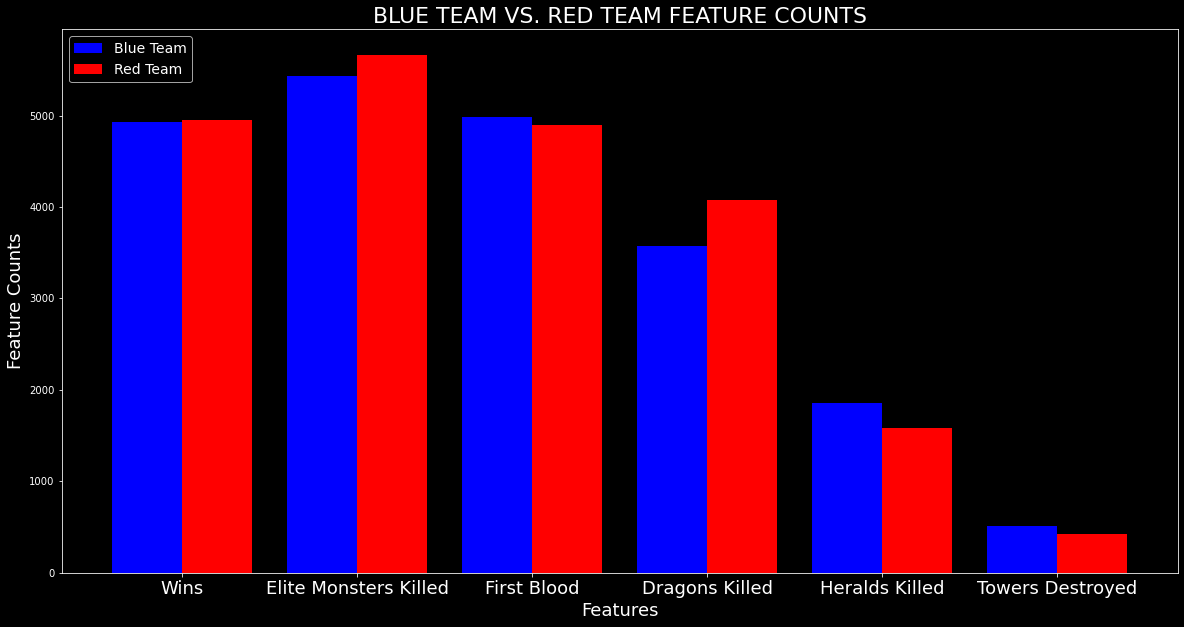

In [15]:
# Create the x axis tick names using chosen sample features
x_axis = ["Wins","Elite Monsters Killed", "First Blood","Dragons Killed","Heralds Killed","Towers Destroyed"]

# Create y axis for Blue Team Values
y_axis1 = Blue_vs_Red.loc[["Wins", "Elite Monsters","First Blood", "Dragons", "Heralds","Towers Destroyed"],
                          "Blue Team"]
# Create y axis for Red Team Values
y_axis2 = Blue_vs_Red.loc[["Wins", "Elite Monsters","First Blood", "Dragons", "Heralds","Towers Destroyed"],
                          "Red Team"]

# Set style to dark_background to best match presentation
plt.style.use('dark_background')

# Set the size of the graph
plt.figure(figsize = (20,10))
# Add a title with x-axis and y-axis label
plt.title("BLUE TEAM VS. RED TEAM FEATURE COUNTS", fontsize = 22)
plt.xlabel("Features", fontsize = 18)
plt.ylabel("Feature Counts", fontsize = 18)

# Plot the Blue Team and Red Team bar graphs with aesthetics to create side-by-side comparison.
plt.bar(x_axis, y_axis1, color = "blue", label = "Blue Team", width = -0.4, align = "edge")
plt.bar(x_axis, y_axis2, color = "red", label = "Red Team", width = 0.4, align = "edge")
plt.xticks(fontsize = 18)

# Add the legend to the chart
plt.legend(loc='upper left', fontsize = 14)


# Remove comment to Save the Chart as a .png
plt.savefig("Blue vs Red Feature Counts")

# Show the Chart
plt.show()

The results reveal that the Red Team had 19 more wins than the Blue Team, a less than 0.4% difference. Some may infer that the chart of the sample features above suggest a higher number of Minions, Jungle Minions, Elite Monsters and Dragons killed in the first 10 minutes of a game may contribute to a win. However, the difference in wins between the Blue and Red Teams in the data is so miniscule that further analysis will be required to see if these inferences hold true when examined at a more granular level.

Due to the possible correlation between many of the blue and red team features, adding "blue to red" ratios of the features will consolidate correlations into one feature and provide additional insight for analysis. 

In [16]:
# Add calculated fields displaying Blue/Red ratio for key features.

LoL_df["Kill Ratio"] = (LoL_df["blueKills"]+1)/(LoL_df["redKills"]+1)
LoL_df["First Blood Ratio"] = (LoL_df["blueFirstBlood"]+1)/(LoL_df["redFirstBlood"]+1)
LoL_df["Wards Placed Ratio"] = (LoL_df["blueWardsPlaced"]+1)/(LoL_df["redWardsPlaced"]+1)
LoL_df["Wards Destroyed Ratio"] = (LoL_df["blueWardsDestroyed"]+1)/(LoL_df["redWardsDestroyed"]+1)
LoL_df["Assist Ratio"] = (LoL_df["blueAssists"]+1)/(LoL_df["redAssists"]+1)
LoL_df["Elite Monster Ratio"] = round((LoL_df["blueEliteMonsters"]+1)/(LoL_df["redEliteMonsters"]+1),2)
LoL_df["Dragon Ratio"] = round((LoL_df["blueDragons"]+1)/(LoL_df["redDragons"]+1),2)
LoL_df["Herald Ratio"] = round((LoL_df["blueHeralds"]+1)/(LoL_df["redHeralds"]+1),2)
LoL_df["Towers Destroyed Ratio"] =round((LoL_df["blueTowersDestroyed"]+1)/(LoL_df["redTowersDestroyed"]+1),2)
LoL_df["Gold Ratio"] = LoL_df["blueTotalGold"]/LoL_df["redTotalGold"]
LoL_df["Avg Level Ratio"] = LoL_df["blueAvgLevel"]/LoL_df["redAvgLevel"]
LoL_df["Experience Ratio"] = LoL_df["blueTotalExperience"]/LoL_df["redTotalExperience"]
LoL_df["Minions Killed Ratio"] = LoL_df["blueTotalMinionsKilled"]/LoL_df["redTotalMinionsKilled"]
LoL_df["Jungle Minions Killed Ratio"]= LoL_df["blueTotalJungleMinionsKilled"]/LoL_df["redTotalJungleMinionsKilled"]
LoL_df["CS Per Min Ratio"] = LoL_df["blueCSPerMin"]/LoL_df["redCSPerMin"]
LoL_df["Gold Per Min Ratio"] = LoL_df["blueGoldPerMin"]/LoL_df["redGoldPerMin"]

In [17]:
# Check first 5 rows of newly added calculated fields
LoL_df.iloc[:,40:].head(5)

,Kill Ratio,First Blood Ratio,Wards Placed Ratio,Wards Destroyed Ratio,Assist Ratio,Elite Monster Ratio,Dragon Ratio,Herald Ratio,Towers Destroyed Ratio,Gold Ratio,Avg Level Ratio,Experience Ratio,Minions Killed Ratio,Jungle Minions Killed Ratio,CS Per Min Ratio,Gold Per Min Ratio
0,1.428571,2.0,1.812500,0.428571,1.333333,1.00,1.0,1.0,1.0,1.038812,0.970588,0.999531,0.989848,0.654545,0.989848,1.038812
1,1.000000,0.5,1.000000,1.000000,2.000000,0.33,0.5,0.5,0.5,0.834960,0.970588,0.932733,0.725000,0.826923,0.725000,0.834960
2,0.666667,0.5,1.000000,0.250000,0.333333,2.00,2.0,1.0,1.0,0.932196,0.941176,0.940130,0.916256,1.642857,0.916256,0.932196
3,0.833333,0.5,2.750000,0.666667,0.545455,2.00,1.0,2.0,1.0,0.919833,1.000000,0.999610,0.855319,1.170213,0.855319,0.919833
4,1.000000,0.5,4.222222,1.666667,0.875000,0.50,0.5,1.0,1.0,0.942312,1.000000,1.012559,0.933333,0.850746,0.933333,0.942312


In [18]:
# Display the stats for the newly added "blue to red" ratios
LoL_df.iloc[:,40:].describe()

,Kill Ratio,First Blood Ratio,Wards Placed Ratio,Wards Destroyed Ratio,Assist Ratio,Elite Monster Ratio,Dragon Ratio,Herald Ratio,Towers Destroyed Ratio,Gold Ratio,Avg Level Ratio,Experience Ratio,Minions Killed Ratio,Jungle Minions Killed Ratio,CS Per Min Ratio,Gold Per Min Ratio
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,1.250453,1.257212,1.258805,1.312315,1.457118,1.219344,1.155431,1.107956,1.029532,1.011637,1.001094,1.004009,1.007892,1.028180,1.007892,1.011637
std,0.987577,0.750003,1.123732,1.144987,1.577974,0.783634,0.664184,0.465135,0.261402,0.150598,0.070107,0.109621,0.150138,0.345823,0.150138,0.150598
min,0.062500,0.500000,0.055762,0.045455,0.047619,0.330000,0.500000,0.500000,0.330000,0.497681,0.648649,0.537031,0.443350,0.000000,0.443350,0.497681
25%,0.666667,0.500000,0.777778,0.666667,0.571429,0.500000,0.500000,1.000000,1.000000,0.907911,0.945946,0.930463,0.908257,0.818182,0.908257,0.907911
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000801,1.000000,0.998450,0.995633,1.000000,0.995633,1.000801
75%,1.500000,2.000000,1.285714,1.500000,1.750000,2.000000,2.000000,1.000000,1.000000,1.102295,1.031250,1.070095,1.093957,1.181818,1.093957,1.102295
max,17.000000,2.000000,17.000000,23.000000,18.000000,3.000000,2.000000,2.000000,5.000000,1.959020,1.500000,1.789775,2.186916,13.750000,2.186916,1.959020


Often the difference in two opposing teams' scores or performance stats taken early in a match can determine a clear advantage towards a win.  By observing number of kills, items collected and items destroyed between two opposing teams at the  10-minute mark of the game, will the difference of these features between the two teams impact the win or loss outcome.

To visualize this difference, each feature will be discretized to reflect games where the Blue Team had more or less feature counts than the Red Team. Comparisons will then be charted.

Create Blue/Red ratio bins with the following definitions: 
* ratio < 1: means the Blue Team had "Less" feature counts than the Red Team
* ratio > 1: means the Blue Team had "More" feature counts than the Red Team 

In [19]:
# Create ratiobins. The highest ratio value is 23 therefore 24 is chosen as the max.
ratiobins = [0,1,24]

# The labels "Less" and "More" will be used to indicate 
# Blue Team's feature count compared to Red Team
ratiolabels = ["Less than Red Team", "More than Red Team"]

Apply the ratiobins and ratiolabels to ratio features and add them as columns to LoL_df data frame.

In [20]:
# Add the bin definitions to ratio features as their own columns.
LoL_df["Kill Ratio Bin"]= pd.cut(LoL_df["Kill Ratio"],ratiobins, labels = ratiolabels)
LoL_df["Wards Placed Ratio Bin"]= pd.cut(LoL_df["Wards Placed Ratio"],ratiobins, labels = ratiolabels)
LoL_df["Wards Destroyed Ratio Bin"]= pd.cut(LoL_df["Wards Destroyed Ratio"],ratiobins, labels = ratiolabels)
LoL_df["Assist Ratio Bin"]= pd.cut(LoL_df["Assist Ratio"],ratiobins, labels = ratiolabels)
LoL_df["Elite Monster Ratio Bin"]= pd.cut(LoL_df["Elite Monster Ratio"],ratiobins, labels = ratiolabels)
LoL_df["Dragon Ratio Bin"]= pd.cut(LoL_df["Dragon Ratio"],ratiobins, labels = ratiolabels)
LoL_df["Herald Ratio Bin"]= pd.cut(LoL_df["Herald Ratio"],ratiobins, labels = ratiolabels)
LoL_df["Towers Destroyed Ratio Bin"]= pd.cut(LoL_df["Towers Destroyed Ratio"],ratiobins, labels = ratiolabels)
LoL_df["Gold Ratio Bin"]= pd.cut(LoL_df["Gold Ratio"],ratiobins, labels = ratiolabels)
LoL_df["Avg Level Ratio Bin"]= pd.cut(LoL_df["Avg Level Ratio"],ratiobins, labels = ratiolabels)
LoL_df["Experience Ratio Bin"]= pd.cut(LoL_df["Experience Ratio"],ratiobins, labels = ratiolabels)
LoL_df["Minions Ratio Bin"]= pd.cut(LoL_df["Minions Killed Ratio"],ratiobins, labels = ratiolabels)
LoL_df["Jungle Minions Ratio Bin"]= pd.cut(LoL_df["Jungle Minions Killed Ratio"],ratiobins, labels = ratiolabels)

In [21]:
# Check the first five rows of newly added columns
LoL_df.iloc[:,56:].head()

,Kill Ratio Bin,Wards Placed Ratio Bin,Wards Destroyed Ratio Bin,Assist Ratio Bin,Elite Monster Ratio Bin,Dragon Ratio Bin,Herald Ratio Bin,Towers Destroyed Ratio Bin,Gold Ratio Bin,Avg Level Ratio Bin,Experience Ratio Bin,Minions Ratio Bin,Jungle Minions Ratio Bin
0,More than Red Team,More than Red Team,Less than Red Team,More than Red Team,Less than Red Team,Less than Red Team,Less than Red Team,Less than Red Team,More than Red Team,Less than Red Team,Less than Red Team,Less than Red Team,Less than Red Team
1,Less than Red Team,Less than Red Team,Less than Red Team,More than Red Team,Less than Red Team,Less than Red Team,Less than Red Team,Less than Red Team,Less than Red Team,Less than Red Team,Less than Red Team,Less than Red Team,Less than Red Team
2,Less than Red Team,Less than Red Team,Less than Red Team,Less than Red Team,More than Red Team,More than Red Team,Less than Red Team,Less than Red Team,Less than Red Team,Less than Red Team,Less than Red Team,Less than Red Team,More than Red Team
3,Less than Red Team,More than Red Team,Less than Red Team,Less than Red Team,More than Red Team,Less than Red Team,More than Red Team,Less than Red Team,Less than Red Team,Less than Red Team,Less than Red Team,Less than Red Team,More than Red Team
4,Less than Red Team,More than Red Team,More than Red Team,Less than Red Team,Less than Red Team,Less than Red Team,Less than Red Team,Less than Red Team,Less than Red Team,Less than Red Team,More than Red Team,Less than Red Team,Less than Red Team


Group the features by "Win-Loss" and ratio bins and aggregate the counts into a new data frame named Wins_Ratio_Summary

In [22]:
# Add a Win-Loss column to LoL_df where a "Win" is defined as blueWins = 1, otherwise "Loss"
LoL_df.loc[LoL_df["blueWins"] == 1,"Win-Loss"] = "Blue Won"
LoL_df.loc[LoL_df["blueWins"] == 0,"Win-Loss"] = "Blue Lost"

LoL_dfc = LoL_df.copy()
LoL_dfc = LoL_dfc.rename(columns = {"Kill Ratio Bin": "Feature Counts"})

# Group the features by "blueWins" and ratio bins
KillRatio_Wins = LoL_dfc.groupby(["Win-Loss","Feature Counts"])
WardsPlaced_Wins = LoL_df.groupby(["Win-Loss","Wards Placed Ratio Bin"])
WardsDestroy_Wins = LoL_df.groupby(["Win-Loss","Wards Destroyed Ratio Bin"])
AssistRatio_Wins = LoL_df.groupby(["Win-Loss","Assist Ratio Bin"])
EliteMonster_Wins = LoL_df.groupby(["Win-Loss","Elite Monster Ratio Bin"])
Dragon_Wins = LoL_df.groupby(["Win-Loss","Dragon Ratio Bin"])
Herald_Wins = LoL_df.groupby(["Win-Loss","Herald Ratio Bin"])
TowersDestroy_Wins = LoL_df.groupby(["Win-Loss","Towers Destroyed Ratio Bin"])
GoldRatio_Wins = LoL_df.groupby(["Win-Loss","Gold Ratio Bin"])
AvgLevel_Wins = LoL_df.groupby(["Win-Loss","Avg Level Ratio Bin"])
Experience_Wins = LoL_df.groupby(["Win-Loss","Experience Ratio Bin"])
MinionsRatio_Wins = LoL_df.groupby(["Win-Loss","Minions Ratio Bin"])
JungleMinions_Wins = LoL_df.groupby(["Win-Loss","Jungle Minions Ratio Bin"])


# Place the ratio bin counts by "blueWins" into a data frame called "Wins_Ratio_Summary"
Wins_Ratio_Summary = pd.DataFrame([KillRatio_Wins["Kill Ratio"].count(),
                                  WardsPlaced_Wins["Wards Placed Ratio"].count(),
                                  WardsDestroy_Wins["Wards Destroyed Ratio"].count(),
                                  AssistRatio_Wins["Assist Ratio"].count(),
                                  EliteMonster_Wins["Elite Monster Ratio"].count(),
                                  Dragon_Wins["Dragon Ratio"].count(),
                                  Herald_Wins["Herald Ratio"].count(),
                                  TowersDestroy_Wins["Towers Destroyed Ratio"].count(),
                                  GoldRatio_Wins["Gold Ratio"].count(),
                                  AvgLevel_Wins["Avg Level Ratio"].count(),
                                  Experience_Wins["Experience Ratio"].count(),
                                  MinionsRatio_Wins["Minions Killed Ratio"].count(),
                                  JungleMinions_Wins["Jungle Minions Killed Ratio"].count()])

# Rename the rows
Wins_Ratio_Summary = Wins_Ratio_Summary.rename(index = {"Kill Ratio": "Enemy Player Kills", 
                                                        "Wards Placed Ratio": "Wards Placed",
                                                        "Wards Destroyed Ratio":"Wards Destroyed", 
                                                        "Assist Ratio":"Assists",
                                                        "Elite Monster Ratio": "Elite Monster Kills", 
                                                        "Dragon Ratio": "Dragon Kills","Herald Ratio": "Herald Kills",
                                                        "Towers Destroyed Ratio": "Towers Destroyed",
                                                        "Gold Ratio": "Gold", "Avg Level Ratio": "Avg Level",
                                                        "Experience Ratio": "Experience", 
                                                        "Minions Killed Ratio": "Minion Kills",
                                                        "Jungle Minions Killed Ratio": "Jungle Minion Kills"})

In [23]:
# Print the data frame
Wins_Ratio_Summary

Win-Loss                     Blue Lost                              Blue Won  \
Feature Counts      Less than Red Team More than Red Team Less than Red Team   
Enemy Player Kills                3713               1236               1686   
Wards Placed                      2784               2165               2490   
Wards Destroyed                   3070               1879               2670   
Assists                           3469               1480               1847   
Elite Monster Kills               3782               1167               2726   
Dragon Kills                      3665               1284               2638   
Herald Kills                      4197                752               3825   
Towers Destroyed                  4843                106               4595   
Gold                              3565               1384               1354   
Avg Level                         3882               1067               2019   
Experience                        3563               1386               1452   
Minion Kills                      3180               1769               1922   
Jungle Minion Kills               2969               1978               2354   

Win-Loss                                
Feature Counts      More than Red Team  
Enemy Player Kills                3244  
Wards Placed                      2440  
Wards Destroyed                   2260  
Assists                           3083  
Elite Monster Kills               2204  
Dragon Kills                      2292  
Herald Kills                      1105  
Towers Destroyed                   335  
Gold                              3576  
Avg Level                         2911  
Experience                        3478  
Minion Kills                      3008  
Jungle Minion Kills               2576

The difference in activity counts between competing teams during the first 10-minutes of a game could provide more insight into which activities may contribute to a win or loss.  In theory a team with more kills, items destroyed or items collected than their opponent will have a better chance of winning? 

#### Chart comparison for all kill related data where Blue Team Wins

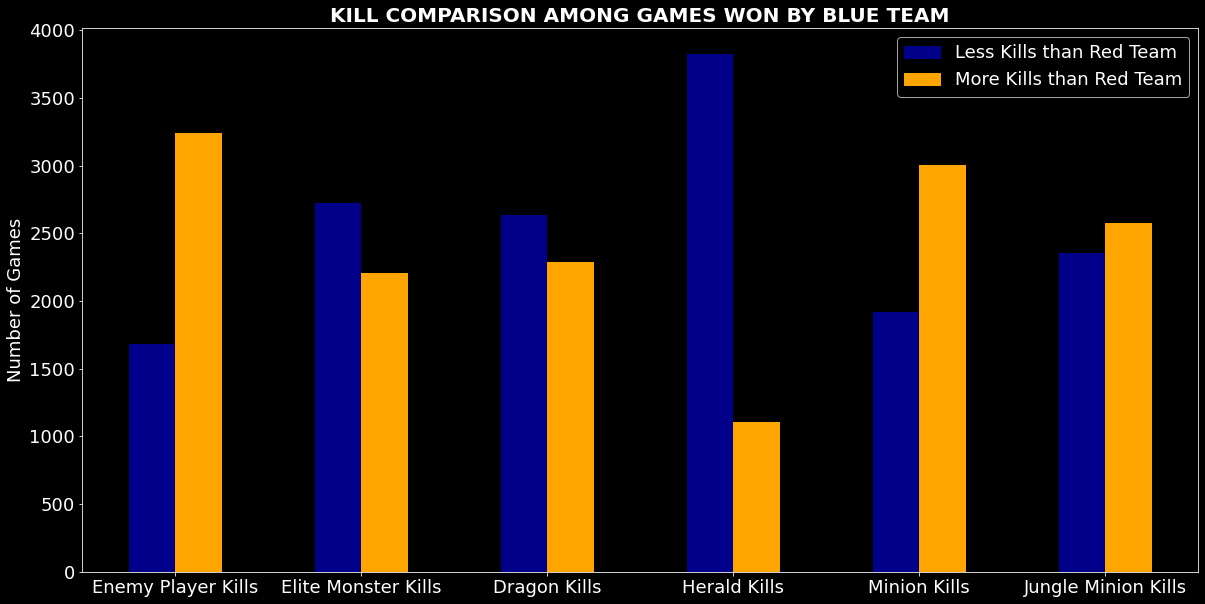

In [24]:
# Move all Games Won data from Wins_Ratio_Summary into its own data frame
Blue_Won = Wins_Ratio_Summary.iloc[:,2:4]

# Move all Kill related data from Games_Won into a data frame
Blue_Won_Kills = Blue_Won.loc[["Enemy Player Kills", "Elite Monster Kills", "Dragon Kills",
                                 "Herald Kills", "Minion Kills", "Jungle Minion Kills"]]

# Legend definitions for plot
bpatch = mpatches.Patch(color = "darkblue", label = "Less Kills than Red Team")
opatch = mpatches.Patch(color = "orange", label = "More Kills than Red Team")

# Use dark_background style for best use with presentation
plt.style.use('dark_background')

# Plot the Games_Won_Kills data
Blue_Won_Kills.plot(kind = 'bar', figsize = (20,10), color = ["darkblue", "orange"], rot = "horizontal",
                    fontsize = 18)
plt.title("KILL COMPARISON AMONG GAMES WON BY BLUE TEAM", fontsize = 20, weight = 'bold')
plt.ylabel("Number of Games", fontsize = 18)
plt.legend(handles = [bpatch, opatch], loc = "best", fontsize = 18)

# Remove comment below to save chart as .png
# plt.savefig('Kill Comparison Among Games Won By Blue Team')

plt.show()


##### Winning Kill Comparison Chart: 
Infers greater Enemy Player Kills, Minion Kills and Jungle Minion Kills than one's opponent at the 10-minute mark of a game may contribute towards a win. While greater Elite Monster Kills, Dragon Kills and Herald Kills may have less impact towards a win.

##### Chart comparisons for all non-kill related data where Blue Team Wins

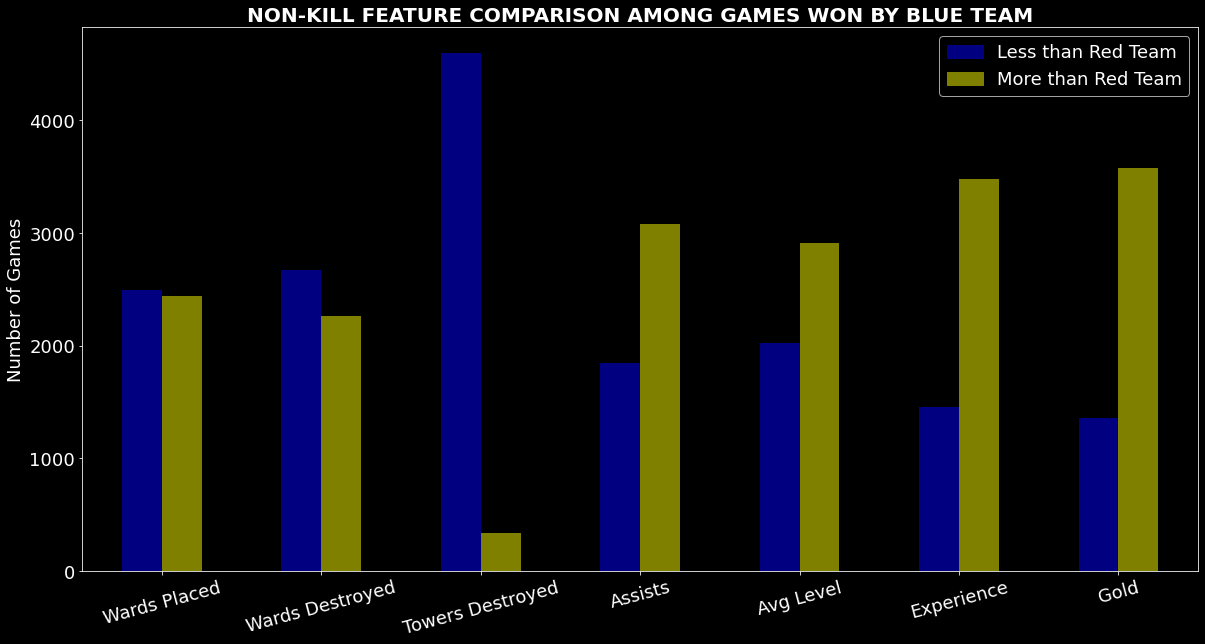

In [25]:
# Move all placed/destroy related data from Games_Won into a data frame
Blue_Won_NonKill = Blue_Won.loc[["Wards Placed", "Wards Destroyed", "Towers Destroyed", "Assists",
                                  "Avg Level", "Experience", "Gold"]]

# Legend definitions for plot
navypatch = mpatches.Patch(color = "navy", label = "Less than Red Team")
olivepatch = mpatches.Patch(color = "olive", label = "More than Red Team")

# Plot the Games_Won_Kills data
Blue_Won_NonKill.plot(kind = 'bar', figsize = (20,10), color = ["navy", "olive"], rot = 15,
                    fontsize = 18)
plt.title("NON-KILL FEATURE COMPARISON AMONG GAMES WON BY BLUE TEAM", fontsize = 20, weight = 'bold')
plt.ylabel("Number of Games", fontsize = 18)
plt.legend(handles = [navypatch, olivepatch], loc = "best", fontsize = 18)

# Remove comment below to save chart as .png
# plt.savefig('NonKill Comparison Among Games Won By Blue Team')

plt.show()


##### Winning Non-Kill Feature Comparison Chart: 
Infers greater number of Assists, more Gold, higher Avg Level, and more Experience than one's opponent at the 10-minute mark of a game are more likely to contribute towards a win. While more Wards Placed, more Wards Destroyed and more Towers Destroyed may have less impact towards a win.

##### Chart comparisons for all kill related data where Blue Team Loses

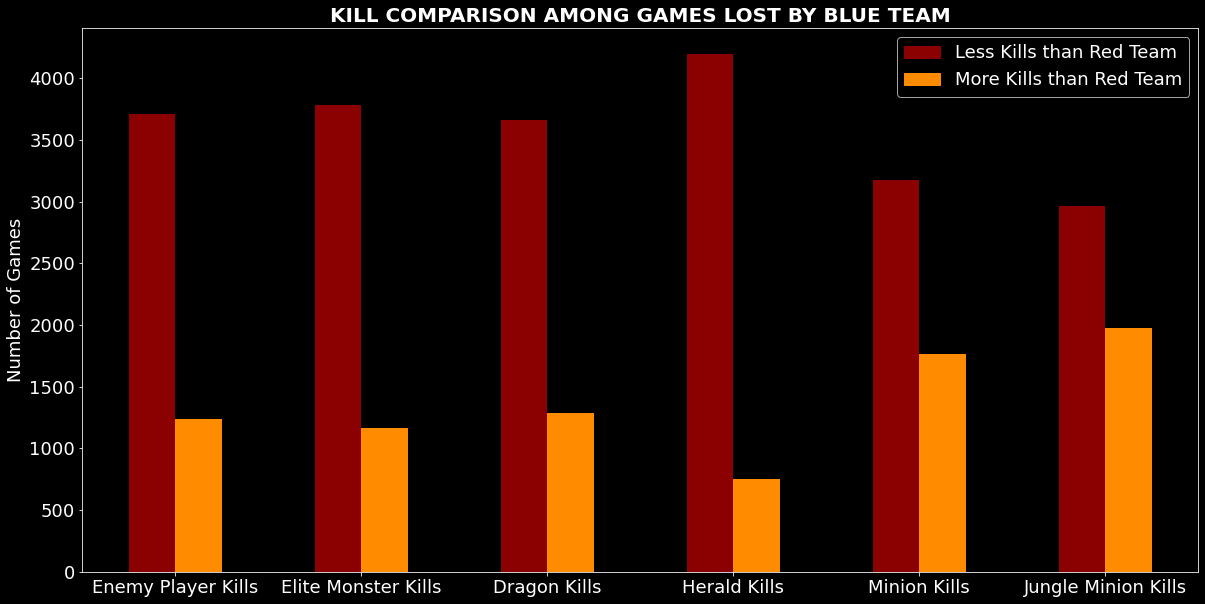

In [26]:
# Move all Games Won data from Wins_Ratio_Summary into its own data frame
Blue_Lost = Wins_Ratio_Summary.iloc[:,0:2]

# Move all Kill related data from Games_Won into a data frame
Blue_Lost_Kills = Blue_Lost.loc[["Enemy Player Kills", "Elite Monster Kills", "Dragon Kills",
                                 "Herald Kills", "Minion Kills", "Jungle Minion Kills"]]

# Legend definitions for plot
drpatch = mpatches.Patch(color = "darkred", label = "Less Kills than Red Team")
dopatch = mpatches.Patch(color = "darkorange", label = "More Kills than Red Team")

# Plot the Games_Won_Kills data
Blue_Lost_Kills.plot(kind = 'bar', figsize = (20,10), color = ["darkred", "darkorange"], rot = "horizontal",
                    fontsize = 18)
plt.title("KILL COMPARISON AMONG GAMES LOST BY BLUE TEAM", fontsize = 20, weight = 'bold')
plt.ylabel("Number of Games", fontsize = 18)
plt.legend(handles = [drpatch, dopatch], loc = "best", fontsize = 18)

# Remove comment below to save chart as .png
# plt.savefig('Kill Comparison Among Games Lost By Blue Team')

plt.show()

###### Losing Kill Comparison Chart:
Infers having fewer kills than one's opponent in any kill category at the 10-minute mark of the game is more likely to result in a lost game.

##### Chart comparisons of all non-kill related data where Blue Team Loses

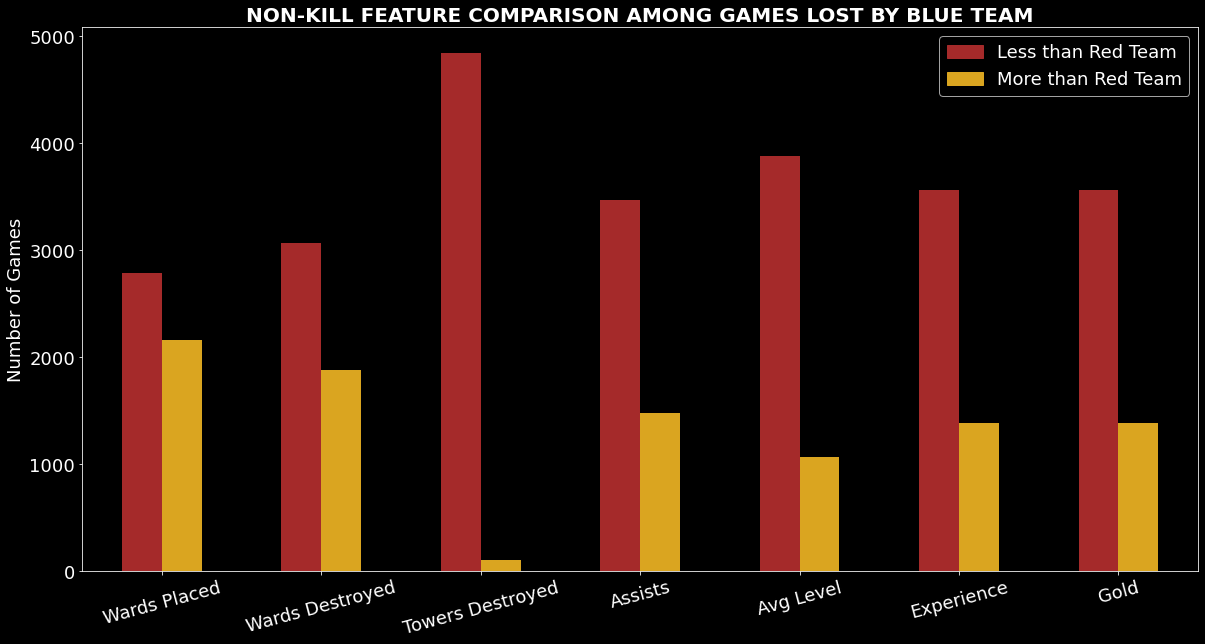

In [27]:
# Move all placed/destroy related data from Games_Won into a data frame
Blue_Lost_NonKill = Blue_Lost.loc[["Wards Placed", "Wards Destroyed", "Towers Destroyed", "Assists",
                                  "Avg Level", "Experience", "Gold"]]

# Legend definitions for plot
brownpatch = mpatches.Patch(color = "brown", label = "Less than Red Team")
goldrodpatch = mpatches.Patch(color = "goldenrod", label = "More than Red Team")

# Plot the Games_Won_Kills data
Blue_Lost_NonKill.plot(kind = 'bar', figsize = (20,10), color = ["brown", "goldenrod"], rot = 15,
                    fontsize = 18)
plt.title("NON-KILL FEATURE COMPARISON AMONG GAMES LOST BY BLUE TEAM", fontsize = 20, weight = 'bold')
plt.ylabel("Number of Games", fontsize = 18)
plt.legend(handles = [brownpatch, goldrodpatch], loc = "best", fontsize = 18)

# Remove comment below to save chart as .png
# plt.savefig('NonKill Comparison Among Games Lost By Blue Team')

plt.show()


##### Losing Non-Kill Feature Comparison Chart: 
Infers fewer counts than one's opponent in any non-kill feature at the 10-minute mark of a game is more likely to lead to a lost game.

#### The Losing Kill and Non-Kill Feature Comparison Charts abover were consolidated into one chart for the group presentation as shown below.

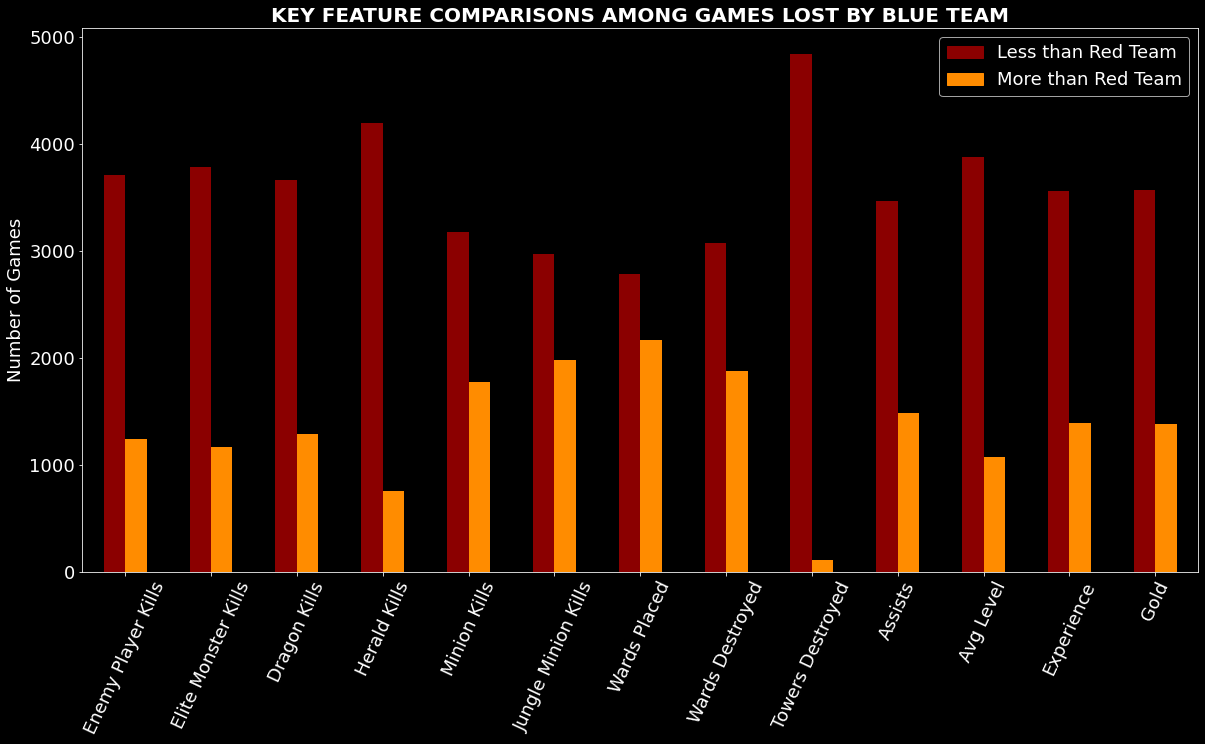

In [28]:
# Move all placed/destroy related data from Games_Won into a data frame
Blue_Lost_Features = Blue_Lost.loc[["Enemy Player Kills", "Elite Monster Kills", "Dragon Kills",
                                 "Herald Kills", "Minion Kills", "Jungle Minion Kills",
                                   "Wards Placed", "Wards Destroyed", "Towers Destroyed", "Assists",
                                  "Avg Level", "Experience", "Gold"]]

# Legend definitions for plot
brownpatch = mpatches.Patch(color = "darkred", label = "Less than Red Team")
goldrodpatch = mpatches.Patch(color = "darkorange", label = "More than Red Team")

# Plot the Games_Won_Kills data
Blue_Lost_Features.plot(kind = 'bar', figsize = (20,10), color = ["darkred", "darkorange"], rot = 65,
                    fontsize = 18)
plt.title("KEY FEATURE COMPARISONS AMONG GAMES LOST BY BLUE TEAM", fontsize = 20, weight = 'bold')
plt.ylabel("Number of Games", fontsize = 18)
plt.legend(handles = [brownpatch, goldrodpatch], loc = "best", fontsize = 18)

# Remove comment below to save chart as .png
plt.savefig('Feature Comparison Among Games Lost By Blue Team')

plt.show()


#### Consolidated Losing Feature Chart Comparison
Infers fewer counts than one's opponent in any feature at the 10-minute mark of a game is more likely to lead to a lost match.

### Predictive Analytical Models:

Two predictive analytical models will be employed to predict win/loss outcome of a match based on team performance stats at the 10-minute mark of a game.

#### 1) Logistic Regression
A supervised machine learning classification algorithm that uses the logarithm odds ratio and maximum likelihood method to predict the probability of a categorical dependent variable. 

#### 2) Decision Tree Classification
A supervised machine learning classification algorithm that uses conditional proabability to predict a categorical dependent variable. 

The categorical dependent variable used as the target in our models are dichotomous or binary which are coded as 1 to equal "win" and a 0 to equal "loss."

#### Load the necessary modules for the predictive models

In [29]:
# Import necessary scikit learn modules 
import math
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from IPython.display import display
pd.options.display.max_columns = None
from sklearn.metrics import plot_roc_curve, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

Below is a visual representation of the correlation matrix for all variables in the data.  It shows high positive correlations in the lighter areas and high negative correlation in the darker areas.

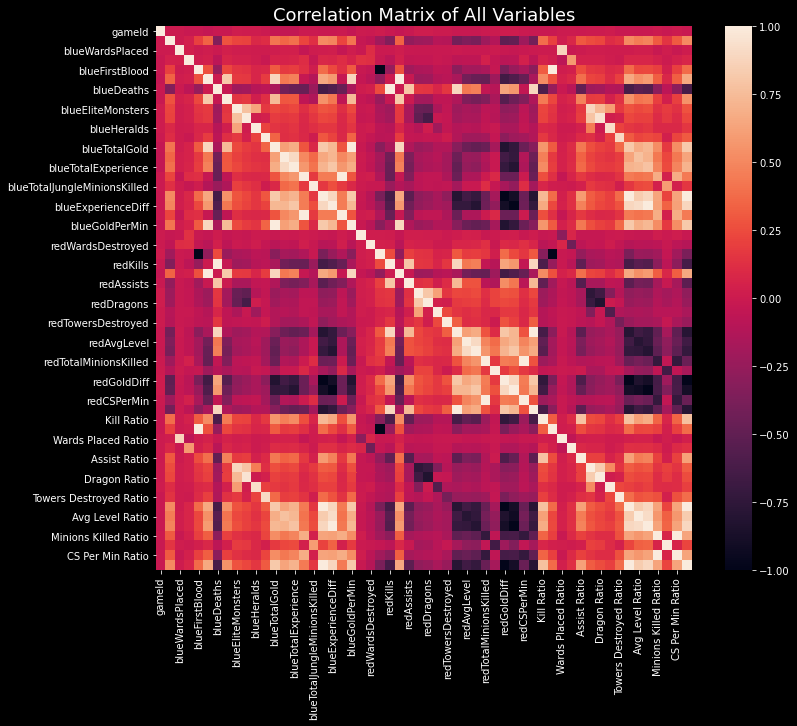

In [30]:
# Transform the data set into a correlation matrix.
corrMatrix = LoL_df.corr()
# Plot the correlation matrix as a heatmap
#  Use a dark background to match presentation
plt.style.use('dark_background')
#  Set figure size and style of correlation matrix
plt.figure(figsize=(12, 10))
plt.title("Correlation Matrix of All Variables", fontsize = 18)
sn.heatmap(corrMatrix, annot=False)

# Remove comment to save chart as .png
plt.savefig("LoL_df Correlation Matrix")

# Print the correlation matrix
plt.show()

The dependent/predicted variable (or y variable) for our models will be "bluewins" where 1 = blue wins and 0 = blue loses.

The independent/predictor variables (x variables) for our models must be chosen carefully to best build a model with high accuracy and precision. Logistic regression models work best when independent variables are correlated with the dependent variable but not correlated to each other.  The correlation matrix will be used to examine how the variables are correlated and determine which variables may best train a model for best accuracy.  

There are two ways to resolve strongly correlated independent variables:
* Drop one of the correlated variables
* Combine the variables

## Logistic Regression Model 1: Single Team Stats

In this logistic regression model the strong correlations between the blue team's performance with the red team's performance in matches against each other are eliminated by taking only one team's performance without accounting for the opponent's stats.

In [31]:
# Two binary logistic regrestions
# One that tries to predict win or loss based on a single teams category values

#Clean the data to make it team neutral

#Grab blue team data
blueTeamData = LoL_df.iloc[:, 1:21]

#Grab red team data and flip the win column to represent whether red team won or lost
redTeamData = LoL_df.iloc[:, 21:]
redTeamData["Game Won"] = LoL_df["blueWins"].apply(lambda won: 1 if won == 0 else 0)

#reorder redTeamData to be in a similar order to blueTeamData
redTeamData = redTeamData[["Game Won"] + list(redTeamData.columns)[0:-1]]

#rename columns to be team neutral
redTeamData = redTeamData.rename(columns = {"redWardsPlaced":"Wards Placed", "redWardsDestroyed": "Wards Destroyed",
                            "redFirstBlood": "First Blood","redKills":"Kills", "redDeaths":"Deaths",
                            "redAssists": "Assists","redEliteMonsters":"Elite Monsters",
                            "redDragons":"Dragons","redHeralds":"Heralds", "redTowersDestroyed": "Towers Destroyed",
                            "redTotalGold": "Total Gold", "redAvgLevel" : "Avg Level",
                            "redTotalExperience": "Total Experience", "redTotalMinionsKilled":"Total Minions Killed",
                            "redTotalJungleMinionsKilled":"Total Jungle Minions Killed","redCSPerMin": "CS Per Min",
                            "redGoldPerMin":"Gold Per Min", "redGoldDiff" : "Gold Diff",
                            "redExperienceDiff" : "Experience Diff"})

blueTeamData = blueTeamData.rename(columns = {"blueWins": "Game Won", "blueWardsPlaced": "Wards Placed",
                            "blueWardsDestroyed": "Wards Destroyed", "blueFirstBlood": "First Blood",
                            "blueKills": "Kills", "blueDeaths": "Deaths", "blueAssists": "Assists",
                            "blueEliteMonsters":"Elite Monsters", "blueDragons": "Dragons","blueHeralds": "Heralds",
                            "blueTowersDestroyed": "Towers Destroyed","blueTotalGold": "Total Gold",
                            "blueAvgLevel" : "Avg Level", "blueTotalExperience": "Total Experience",
                            "blueTotalMinionsKilled":"Total Minions Killed",
                            "blueTotalJungleMinionsKilled": "Total Jungle Minions Killed", "blueCSPerMin": "CS Per Min",
                            "blueGoldPerMin":"Gold Per Min", "blueGoldDiff" : "Gold Diff",
                            "blueExperienceDiff" : "Experience Diff"})

#Put all the data in a single dataframe
teamData = pd.concat([blueTeamData, redTeamData])

#ensure the data looks right. We should now have double the rows.
teamData.describe()

,Game Won,Wards Placed,Wards Destroyed,First Blood,Kills,Deaths,Assists,Elite Monsters,Dragons,Heralds,Towers Destroyed,Total Gold,Avg Level,Total Experience,Total Minions Killed,Total Jungle Minions Killed,Gold Diff,Experience Diff,CS Per Min,Gold Per Min,Kill Ratio,First Blood Ratio,Wards Placed Ratio,Wards Destroyed Ratio,Assist Ratio,Elite Monster Ratio,Dragon Ratio,Herald Ratio,Towers Destroyed Ratio,Gold Ratio,Avg Level Ratio,Experience Ratio,Minions Killed Ratio,Jungle Minions Killed Ratio,CS Per Min Ratio,Gold Per Min Ratio
count,19758.000000,19758.00000,19758.000000,19758.000000,19758.000000,19758.000000,19758.000000,19758.000000,19758.000000,19758.000000,19758.000000,19758.000000,19758.000000,19758.000000,19758.000000,19758.000000,19758.000000,19758.000000,19758.000000,19758.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.500000,22.32812,2.774016,0.500000,6.160796,6.160796,6.653609,0.561545,0.387539,0.174005,0.047221,16496.248456,6.920660,17944.920285,217.024395,50.911378,0.000000,0.000000,21.702440,1649.624846,1.250453,1.257212,1.258805,1.312315,1.457118,1.219344,1.155431,1.107956,1.029532,1.011637,1.001094,1.004009,1.007892,1.028180,1.007892,1.011637
std,0.500013,18.23920,2.157300,0.500013,2.972688,2.972688,4.062473,0.626096,0.487201,0.379124,0.231075,1513.310389,0.305256,1199.641661,21.886926,9.971138,2453.329437,1920.616136,2.188693,151.331039,0.987577,0.750003,1.123732,1.144987,1.577974,0.783634,0.664184,0.465135,0.261402,0.150598,0.070107,0.109621,0.150138,0.345823,0.150138,0.150598
min,0.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-11467.000000,-9333.000000,9.000000,1073.000000,0.062500,0.500000,0.055762,0.045455,0.047619,0.330000,0.500000,0.500000,0.330000,0.497681,0.648649,0.537031,0.443350,0.000000,0.443350,0.497681
25%,0.000000,14.00000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15421.250000,6.800000,17189.000000,203.000000,44.000000,-1590.000000,-1254.000000,20.300000,1542.125000,0.666667,0.500000,0.777778,0.666667,0.571429,0.500000,0.500000,1.000000,1.000000,0.907911,0.945946,0.930463,0.908257,0.818182,0.908257,0.907911
50%,0.500000,16.00000,2.000000,0.500000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16386.000000,7.000000,17963.000000,218.000000,51.000000,0.000000,0.000000,21.800000,1638.600000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000801,1.000000,0.998450,0.995633,1.000000,0.995633,1.000801
75%,1.000000,20.00000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17437.000000,7.200000,18743.000000,232.000000,57.000000,1590.000000,1254.000000,23.200000,1743.700000,1.500000,2.000000,1.285714,1.500000,1.750000,2.000000,2.000000,1.000000,1.000000,1.102295,1.031250,1.070095,1.093957,1.181818,1.093957,1.102295
max,1.000000,276.00000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.200000,22269.000000,289.000000,92.000000,11467.000000,9333.000000,28.900000,2370.100000,17.000000,2.000000,17.000000,23.000000,18.000000,3.000000,2.000000,2.000000,5.000000,1.959020,1.500000,1.789775,2.186916,13.750000,2.186916,1.959020


To find independent variables to use in the logistic regression model a percent of games won by the variables' values will be charted to find independent variables that have linear correlation with the dependent variable: "Game Won".

In [32]:
#Get count of wins and losses per feature value
def getPercentWon(df):
    gamesLost = len(df.loc[df["Game Won"] == 0])
    gamesWon = len(df.loc[df["Game Won"] == 1])
    percentWon = gamesWon / (gamesWon + gamesLost)
    return percentWon * 100

# calculates the percent of wins per independent variable value and makes percent win vs feature scatter plots for
# each independent variable
def makePercentWinVsFeatureScatter(df):
    independentVariables = list(df.columns)[1:]
    for independentVariableName in independentVariables:
        percentWon = df.groupby(independentVariableName).apply(getPercentWon)
        plt.scatter(percentWon.index, percentWon, color='green')
        plt.title('Percent Won by ' + independentVariableName , fontsize=14)
        plt.xlabel("Number of " + independentVariableName, fontsize=14)
        plt.ylabel('Percent Won', fontsize=14)
        plt.grid(True)
        plt.show()
    
    #cs=creep score = jungle minion and minions. comparison to the other teams damaged kill rate of the minion
    #and monster because that's what's giving you advantage. cs score feeds into the jungle and minion totals
    #in the scatter plot. 

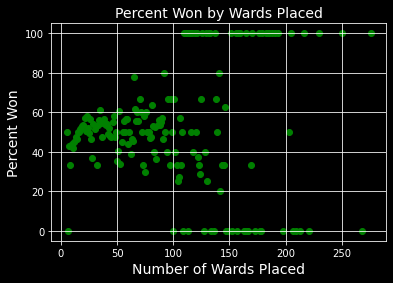

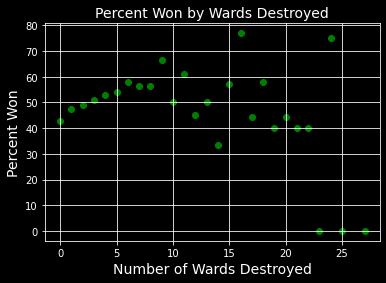

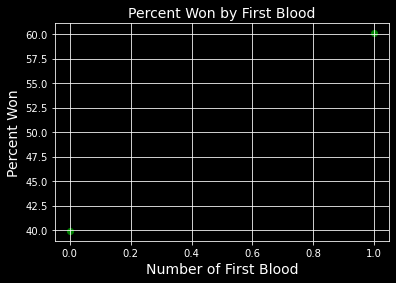

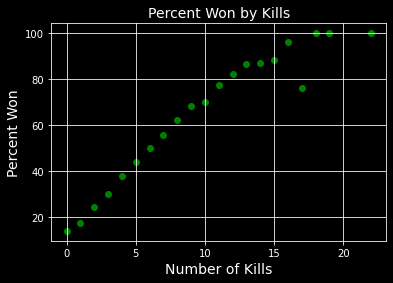

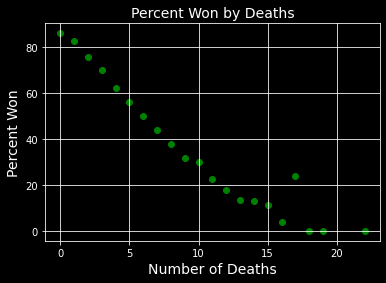

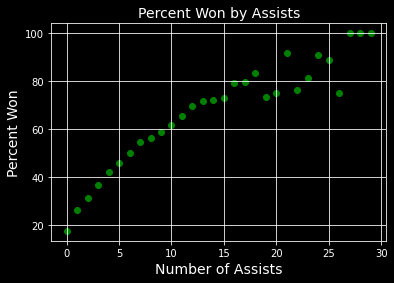

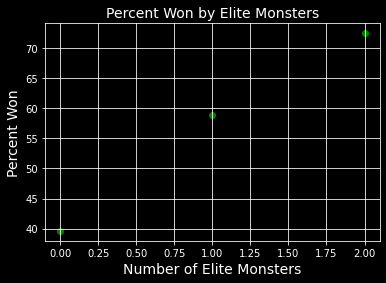

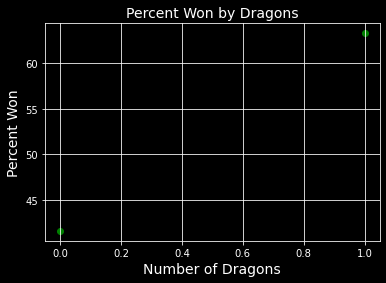

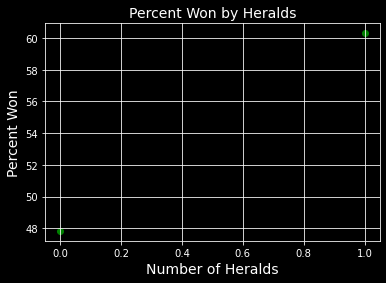

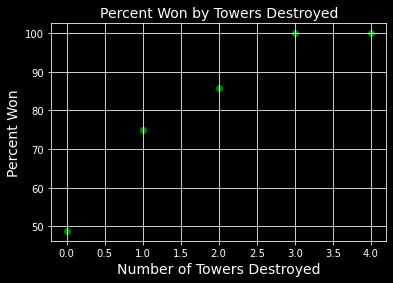

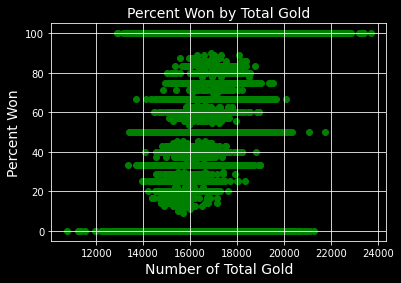

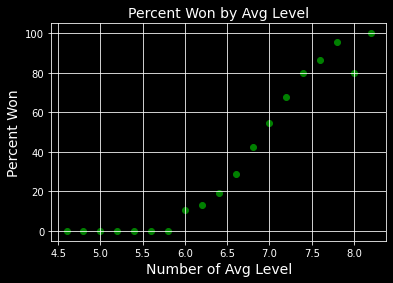

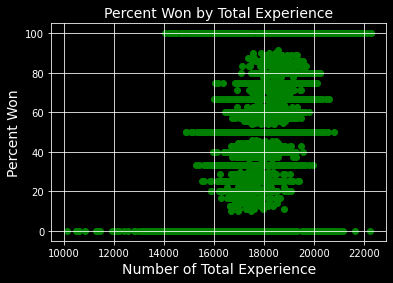

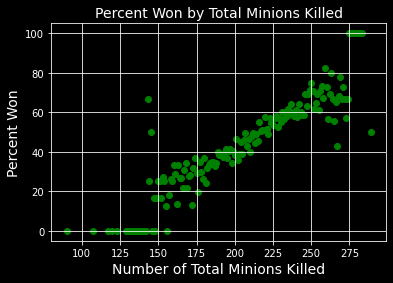

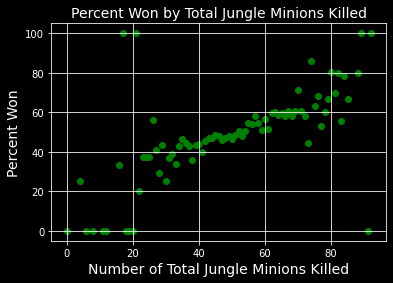

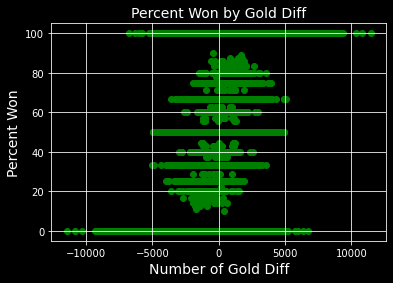

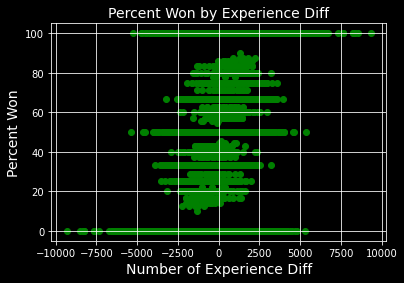

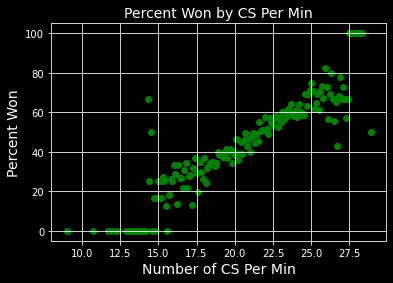

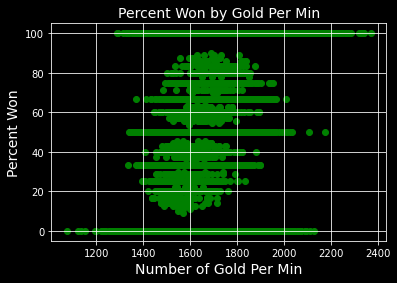

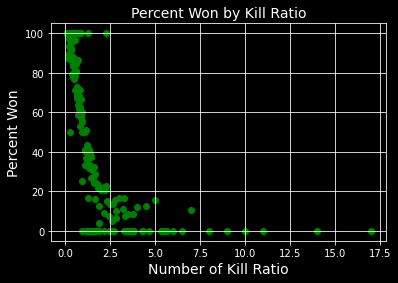

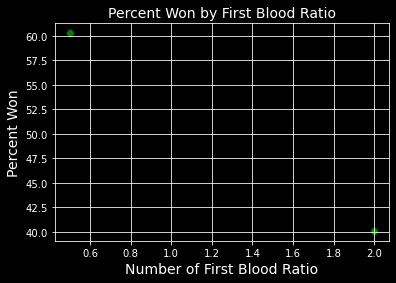

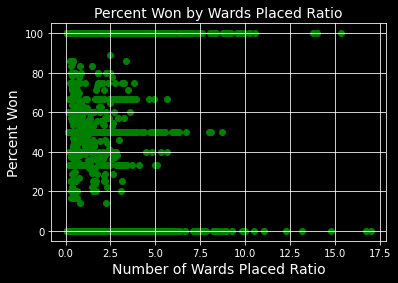

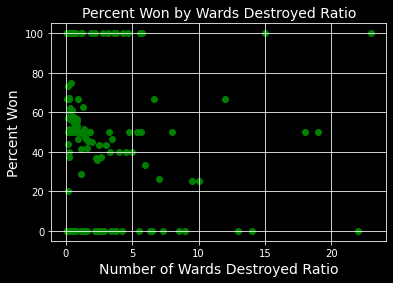

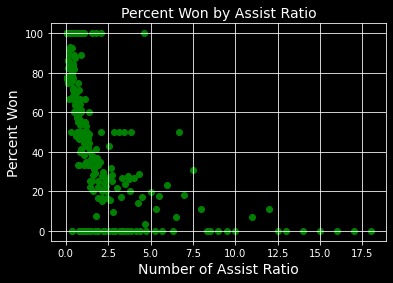

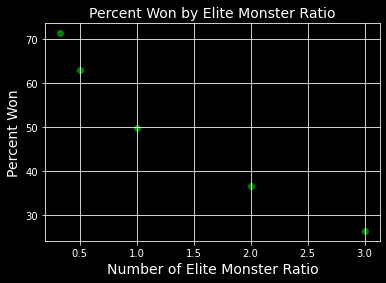

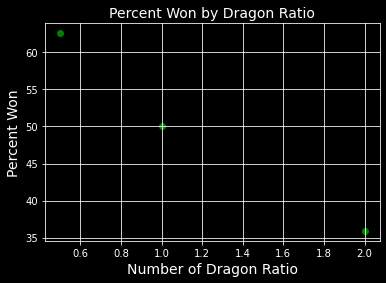

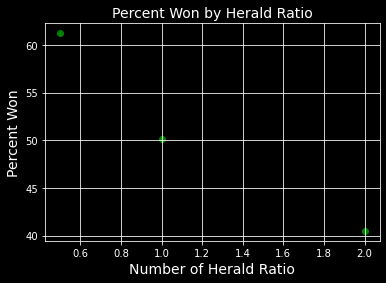

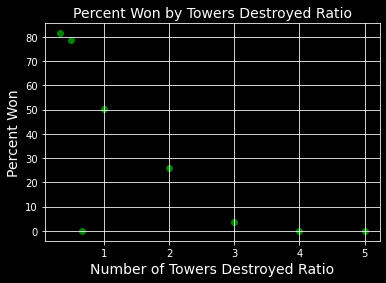

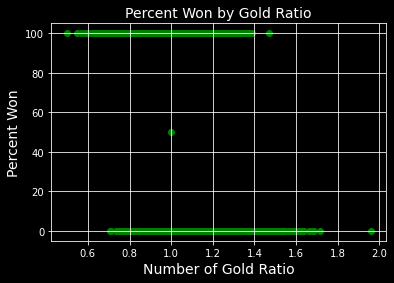

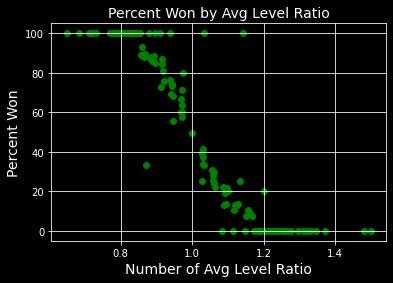

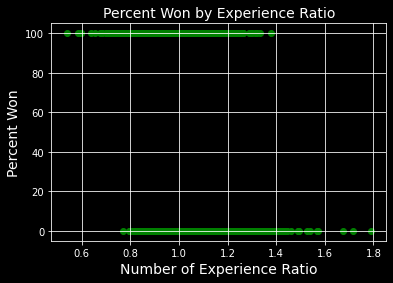

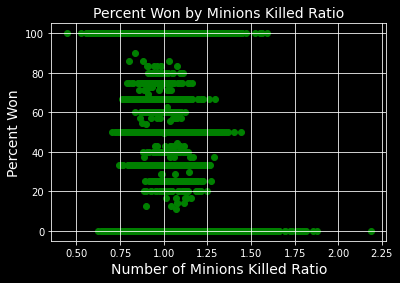

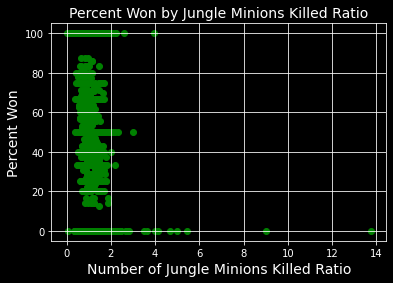

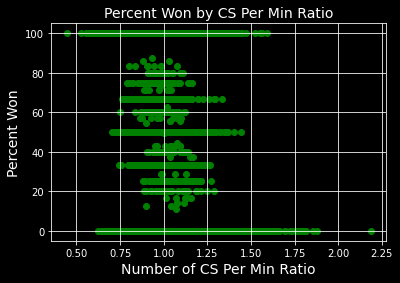

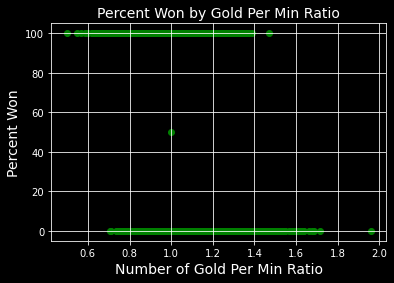

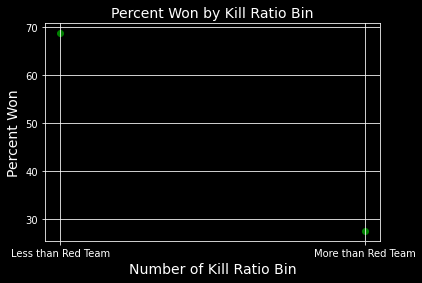

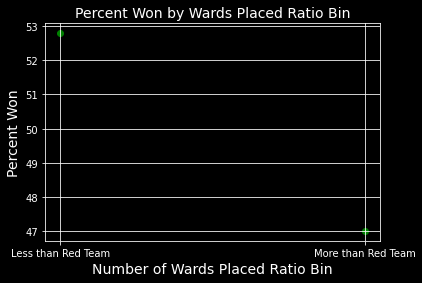

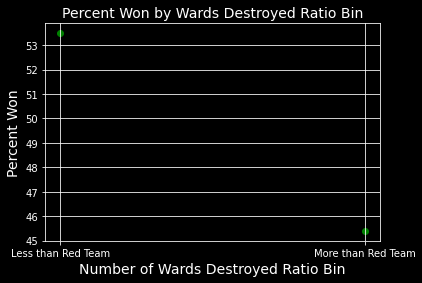

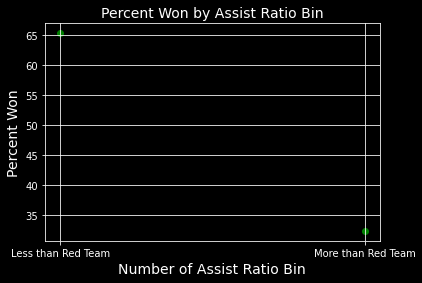

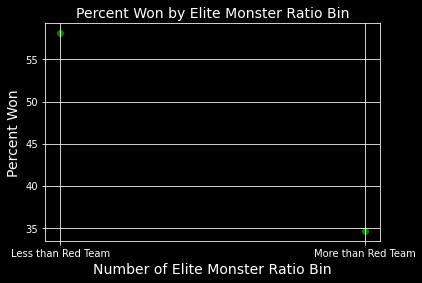

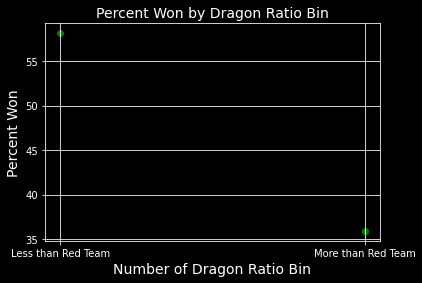

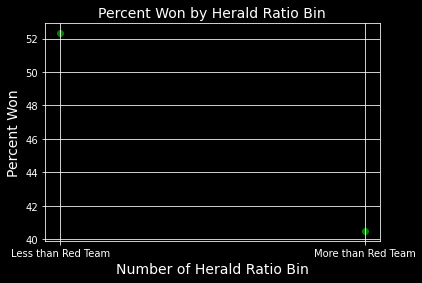

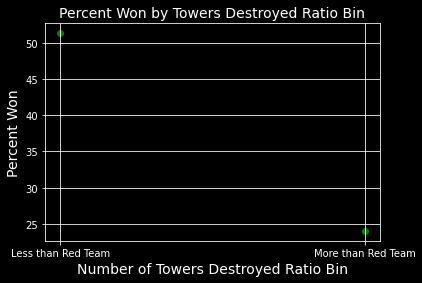

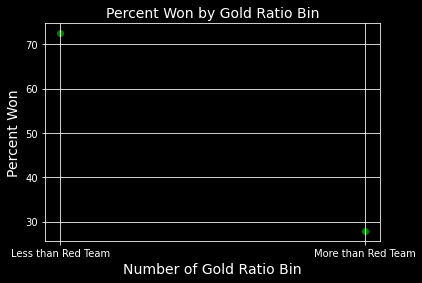

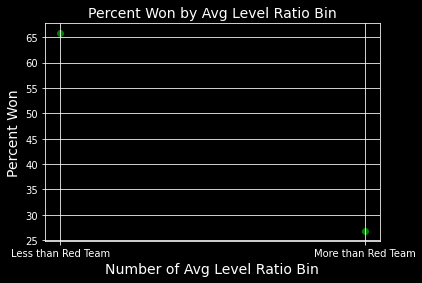

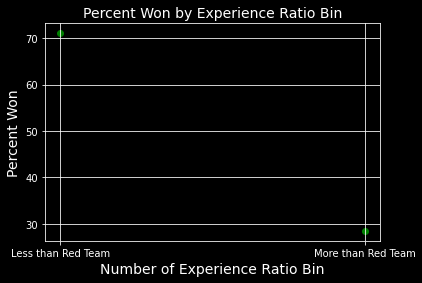

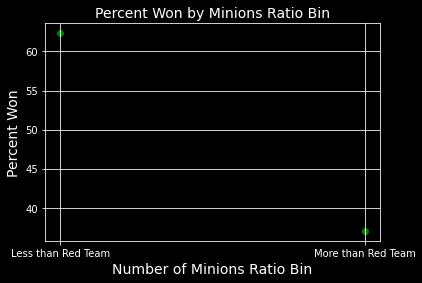

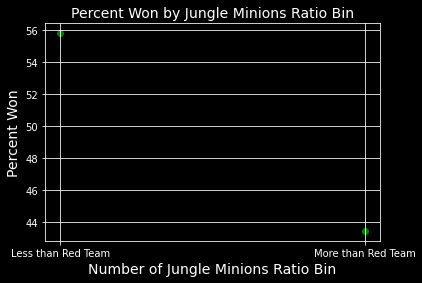

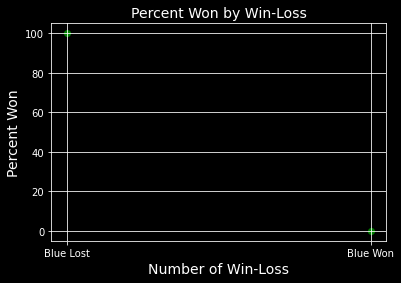

In [33]:
# Plot the charts in a stacked display using functions created above.
makePercentWinVsFeatureScatter(teamData)

For an alternative method of viewing the above charts individually, uncomment the three cells below.

In [34]:
# print("List of available variables:")
# list(teamData.iloc[:,1:].columns)

In [35]:
# Feature = input("Enter a variable from list above to chart Percent Won by variable's values: ")

In [36]:
# percentWon = teamData.groupby(Feature).apply(getPercentWon)

# plt.figure(figsize = (15, 10))
# plt.scatter(percentWon.index, percentWon, color='green', s = 75)
# plt.title('% of Games Won by ' + Feature , fontsize=20)
# plt.xlabel( "Number of " + Feature, fontsize=18)
# plt.ylabel('Percent Won', fontsize=18)
# plt.xticks(fontsize = 14)
# plt.yticks(fontsize = 14)
# plt.grid(True)
# plt.savefig(f"Percent Won by {Feature}.")
# plt.show()

#### Training and Testing Logistic Regression Model 1
Eight to eleven independent variables were chosen for the model based on the linear correlation results depicted in the percent won by variable charts shown above.

In [37]:
#choose our variables for the regression: variables had a linear scatter plot and a more than 20% difference between lowest and highest
logisticRegressionIndependentVars = ['Kills', 'Deaths', 'Assists', 'Elite Monsters', 
                                     'Towers Destroyed', 'Avg Level', 'Total Minions Killed',
                                     'Total Jungle Minions Killed']

#choose a 2/3 cutoff for training and testing data
cutoff = math.floor(2 * len(teamData)/3)

#get the first 2/3 of the data for training our model
train = teamData.iloc[:cutoff, :]

#get the last 1/3 of the data for testing our model
test = teamData.iloc[cutoff:, :]

#train the model
x = train[logisticRegressionIndependentVars].to_numpy() #numpy array of independent vars
y = np.array(train["Game Won"])

#the fit function gave an error that asked us to scale the x
scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x)
model = LogisticRegression().fit(x, y)

#scale the test x using our scaler
test_x = scaler.transform(train[logisticRegressionIndependentVars].to_numpy()) #numpy array of independent vars
test_y = np.array(train["Game Won"])
print("The model's R2 = ",round(model.score(test_x, test_y),4)) 
        # model's x variables explain 71.6% of the variance in y.

The model's R2 =  0.7164


The independent variables "First Blood" and "Death" were added as independent variables to the model which improved the model's accuracy slightly.

In [38]:
#choose our variables for the regression: variables chosen had a linear scatterplot
logisticRegressionIndependentVars = ['First Blood', 'Kills', 'Deaths', 'Assists', 'Elite Monsters', 
                                     'Dragons', 'Heralds', 'Towers Destroyed', 'Avg Level',
                                     'Total Minions Killed', 'Total Jungle Minions Killed']

#choose a 2/3 cutoff for training and testing data
cutoff = math.floor(2 * len(teamData)/3)

#get the first 2/3 of the data for training our model
train = teamData.iloc[:cutoff, :]

#get the last 1/3 of the data for testing our model
test = teamData.iloc[cutoff:, :]

#train the model
x = train[logisticRegressionIndependentVars].to_numpy() #numpy array of independent vars
y = np.array(train["Game Won"])

#the fit function gave an error that asked us to scale the x
scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x)
model = LogisticRegression().fit(x, y)

#scale the test x using our scaler
test_x = scaler.transform(test[logisticRegressionIndependentVars].to_numpy()) #numpy array of independent vars
test_y = np.array(test["Game Won"])

# Store model predictions on X_test
ylog1_pred = model.predict(test_x)

print(f"The model's R2 = {round(model.score(x,y),3)}.")# model's x variables explain 71.8% of the variance in y.
print("\n R2 is a statistical measure representing the proportion of variance in the dependent variable that ")
print("is explained by the independent variables.")
print("\n The model's accuracy score on the test data = ", accuracy_score(test_y,ylog1_pred))

The model's R2 = 0.718.

 R2 is a statistical measure representing the proportion of variance in the dependent variable that 
is explained by the independent variables.

 The model's accuracy score on the test data =  0.713027634375949


##### Confusion matrix of test results for Logistic Regression 1

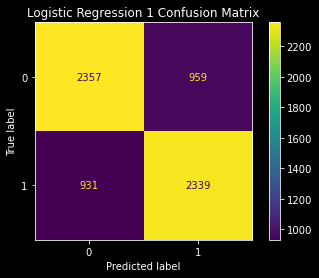

In [39]:
# Plot the confusion matrix with a title
LoL_Log1_ConfusionMatrix = ConfusionMatrixDisplay(confusion_matrix(test_y, ylog1_pred)).plot()
plt.title("Logistic Regression 1 Confusion Matrix")
# Remove comment to save the chart as a .png
# plt.savefig("Logistic Regression 1 CM")
plt.show()

In [40]:
# Print the classification results of the LoL_Logic model
LoL_Log1_report = classification_report(test_y, ylog1_pred)
print(LoL_Log1_report)

              precision    recall  f1-score   support

           0       0.72      0.71      0.71      3316
           1       0.71      0.72      0.71      3270

    accuracy                           0.71      6586
   macro avg       0.71      0.71      0.71      6586
weighted avg       0.71      0.71      0.71      6586



#### The Logistic Regression Model 1 Confusion Matrix provides an overall accuracy of 71% at predicting the test data.
* Precision provides percent of the target values that were correctly predicted.
* Recall provides percent of the target values that were caught.

## Logistic Regression Model 2: Difference Between Blue and Red Team Stats

For this logistic regression model the correlated variables between the blue and red team stats were combined by subtracting the red team variables from the equivalent blue team variables.  The resulting differential variable was used as the independent variables to the model. 

In [41]:
# Do a dataframe of the differences between the red and blue team
# A model of the difference may be more accurate in predicting a winner
differences = pd.DataFrame()
differences["Game Won"] = blueTeamData["Game Won"]
for column in list(blueTeamData.columns)[1:]:
    differences[column] = blueTeamData[column] - redTeamData[column]
differences.head()

,Game Won,Wards Placed,Wards Destroyed,First Blood,Kills,Deaths,Assists,Elite Monsters,Dragons,Heralds,Towers Destroyed,Total Gold,Avg Level,Total Experience,Total Minions Killed,Total Jungle Minions Killed,Gold Diff,Experience Diff,CS Per Min,Gold Per Min
0,0,13,-4,1,3,-3,3,0,0,0,0,643,-0.2,-8,-2,-19,1286,-16,-0.2,64.3
1,0,0,0,-1,0,0,3,-2,-1,-1,-1,-2908,-0.2,-1173,-66,-9,-5816,-2346,-6.6,-290.8
2,0,0,-3,-1,-4,4,-10,1,1,0,0,-1172,-0.4,-1033,-17,18,-2344,-2066,-1.7,-117.2
3,0,28,-1,-1,-1,1,-5,1,0,1,0,-1321,0.0,-7,-34,8,-2642,-14,-3.4,-132.1
4,0,58,2,-1,0,0,-1,-1,-1,0,0,-1004,0.0,230,-15,-10,-2008,460,-1.5,-100.4


#### Training and testing the Logistic Regression Model 2

In [42]:
#choose our variables for the regression: variables chosen had a linear scatterplot
logisticRegressionIndependentVars = ['First Blood', 'Kills', 'Deaths', 'Assists',
                                     'Elite Monsters', 'Dragons', 'Heralds', 'Towers Destroyed',
                                     'Avg Level', 'Total Minions Killed', 'Total Jungle Minions Killed']

#choose a 2/3 cutoff for training and testing data
cutoff = math.floor(2 * len(differences)/3)

#get the first 2/3 of the data for training our model
train = differences.iloc[:cutoff, :]

#get the last 1/3 of the data for testing our model
test = differences.iloc[cutoff:, :]

#train the model
x = train[logisticRegressionIndependentVars].to_numpy() #numpy array of independent vars
y = np.array(train["Game Won"])

#the fit function gave an error that asked us to scale the x
scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x)
model = LogisticRegression().fit(x, y)

#scale the test x using our scaler
test_x = scaler.transform(train[logisticRegressionIndependentVars].to_numpy()) #numpy array of independent vars
test_y = np.array(train["Game Won"])
print("The model's R2 = ",round(model.score(test_x, test_y),4)) 
      # model's x variables explain 72.3% of the variance in y.

The model's R2 =  0.7229


Also ran the Logistic Regression Model 2 with "First Blood" excluded from the independent variables which led to a sligthly more accurate result

In [43]:
#choose our variables for the regression: variables had a linear scatter plot and a more than 20% difference between lowest and highest
logisticRegressionIndependentVars = ['Kills', 'Deaths', 'Assists', 'Elite Monsters',
                                     'Dragons', 'Heralds', 'Towers Destroyed', 'Avg Level',
                                     'Total Minions Killed', 'Total Jungle Minions Killed']

#choose a 2/3 cutoff for training and testing data
cutoff = math.floor(2 * len(differences)/3)

#get the first 2/3 of the data for training our model
train2 = differences.iloc[:cutoff, :]

#get the last 1/3 of the data for testing our model
test2 = differences.iloc[cutoff:, :]

#train the model
x2 = train2[logisticRegressionIndependentVars].to_numpy() #numpy array of independent vars
y2 = np.array(train2["Game Won"])

#the fit function gave an error that asked us to scale the x
scaler = preprocessing.StandardScaler().fit(x2)
x2 = scaler.transform(x2)
model = LogisticRegression().fit(x2, y2)

#scale the test x using our scaler
test_x2 = scaler.transform(test2[logisticRegressionIndependentVars].to_numpy()) #numpy array of independent vars
test_y2 = np.array(test2["Game Won"])

# Store model predictions on X_test
ylog2_pred = model.predict(test_x2)

print("The model's R2 = ", round(model.score(x2,y2),3)) # model's x variables explain 72.5% of the variance in y.
print("\nR2 is a statistical measure representing the proportion of variance in the dependent variable that ")
print("is explained by the independent variables.")
print("\nThe model's accuracy score on the test data = ", accuracy_score(test_y2,ylog2_pred))

The model's R2 =  0.725

R2 is a statistical measure representing the proportion of variance in the dependent variable that 
is explained by the independent variables.

The model's accuracy score on the test data =  0.7206194959003948


#### Logistic Regression Model 2 Confusion Matrix Results on test data.

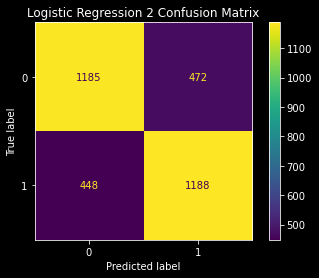

In [44]:
# Plot the confusion matrix with title.
LoL_Log2_ConfusionMatrix = ConfusionMatrixDisplay(confusion_matrix(test_y2, ylog2_pred)).plot()
plt.title("Logistic Regression 2 Confusion Matrix")
# Remove comment below to save chart as .png
# plt.savefig("Logistic Regression 2 CM")
plt.show()

In [45]:
# Print the classification results of the LoL_Logic model
LoL_Log2_report = classification_report(test_y2, ylog2_pred)
print(LoL_Log2_report)

              precision    recall  f1-score   support

           0       0.73      0.72      0.72      1657
           1       0.72      0.73      0.72      1636

    accuracy                           0.72      3293
   macro avg       0.72      0.72      0.72      3293
weighted avg       0.72      0.72      0.72      3293



#### The Logistic Regression Model 2 Confusion Matrix provides an overall accuracy of 72% at predicting the test data. 

## Logistic Regression Model 3: Blue Team/Red Team Ratios
The third logistic regression model combines the Blue and Red team stats as a Blue to Red ration. By creating these ratios as new variables to represent the data negative correlations were eliminated and high correlations were reduced.  An examination of the ratios as a correlation matrix through a heatmap shows: 
* more weak to no correlations 
* a reduced number of moderate correlations
* fewer strong correlations

Definitions above are based on the following:
* no correlation = < 0.2 
* weak correlation = 0.2 to 0.4
* moderate correlation = 0.4 to 0.6
* strong correlation = 0.6 to 0.8
* very strong correlation = > 0.8

See heatmap below. 

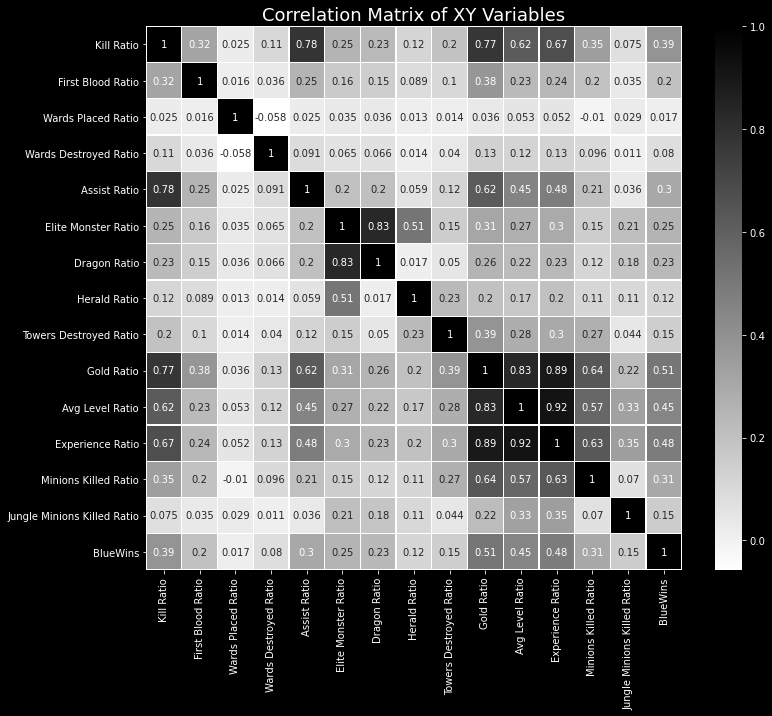

In [46]:
# Take the Blue Team/Red Team ratios (created earlier) and store them in a data frame
XY_variables = LoL_df.iloc[:,40:54]
# Add the y variable: BlueWins
XY_variables["BlueWins"] = LoL_df.iloc[:,1:2]
# Transform dataframe into a correlation matrix
XYMatrix = XY_variables.corr()

# Plot the correlation matrix as a heatmap
plt.style.use('dark_background')

plt.figure(figsize = (12,10))
sn.heatmap(XYMatrix, annot = True, linewidths=.3, cmap ="binary")
plt.title("Correlation Matrix of XY Variables", fontsize = 18)

# Remove comment to save heatmap as .png
plt.savefig("XY Variables Correlation Matrix")

plt.show()

For logistic regression models independent variables would ideally be correlated with the dependent variable, and have no to weak correlation with each other.

Observing the results of correlation matrix above shows that the ratios for First Blood, Wards Placed, Wards Destroyed and Heralds have low to no correlation with the target Blue Wins.  These variables may be excluded from the model's independent variables.

In addition the ratios for Kill, Experience, Gold, and Avg Level have strong correlations (values > 0.7) with other independent variables. Kill will be excluded since it also has low correlation with the target Blue Wins.  Experience, Gold and Avg Level have high correlations with each other. These three variables also have the strongest correlations with the target among all other independent variable candidates.  As the independent variable with the strongest correlations between the three independent variables, Experience will be excluded.  Gold and Avg Level will remain in the model.

In [47]:
# Store the Ratio variables as the x/independent variables for model
X_variables = LoL_df.iloc[:,40:54]

# Based on Correlation Matrix above...
# Exclude variables with low correlation to target "BlueWins"
del X_variables["First Blood Ratio"]
del X_variables["Wards Placed Ratio"]
del X_variables["Wards Destroyed Ratio"]
del X_variables["Herald Ratio"]#

# Exclude independent variables that are highly correlated with other independent variables
del X_variables["Kill Ratio"]
del X_variables["Experience Ratio"]

# Inspect X_variables to be used in Logistic Regression Model
X_variables.head()

,Assist Ratio,Elite Monster Ratio,Dragon Ratio,Towers Destroyed Ratio,Gold Ratio,Avg Level Ratio,Minions Killed Ratio,Jungle Minions Killed Ratio
0,1.333333,1.00,1.0,1.0,1.038812,0.970588,0.989848,0.654545
1,2.000000,0.33,0.5,0.5,0.834960,0.970588,0.725000,0.826923
2,0.333333,2.00,2.0,1.0,0.932196,0.941176,0.916256,1.642857
3,0.545455,2.00,1.0,1.0,0.919833,1.000000,0.855319,1.170213
4,0.875000,0.50,0.5,1.0,0.942312,1.000000,0.933333,0.850746


#### Plot a correlation matrix for the 8 chosen independent variables for Logistic Regression Model 3

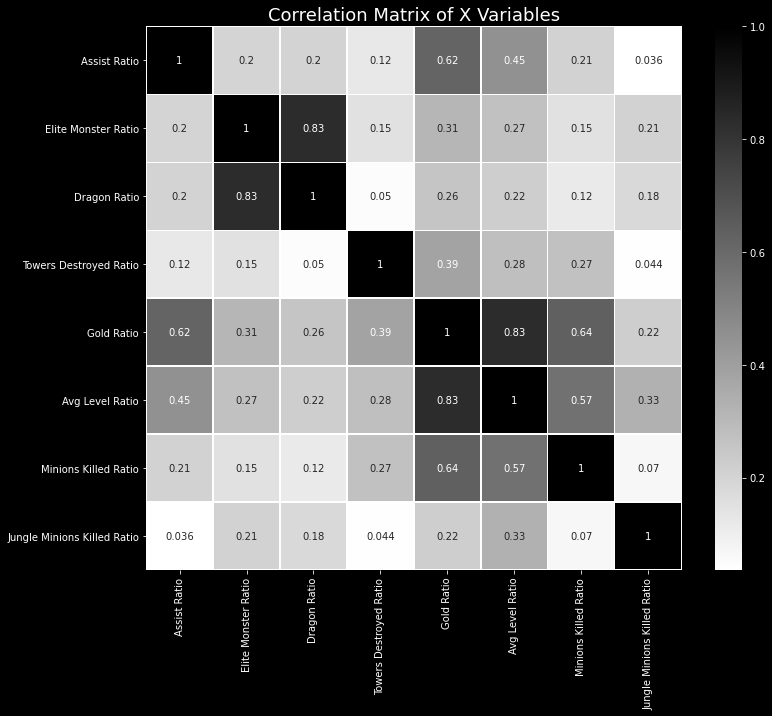

In [48]:
# Transform X_variables to a correlation matrix
X_Matrix = X_variables.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize = (12,10))
sn.heatmap(X_Matrix, annot = True, linewidths=.3, cmap ="binary")
plt.title("Correlation Matrix of X Variables", fontsize = 18)

# Remove comment to save heatmap as .png
plt.savefig("X Variables Correlation Matrix")

plt.show()

Trimming the independent variables to the 8 shown above further reduces the correlation among independent variables.  These 8 variables will be used to train the logistic regression model 3. 

#### Training and Testing Logistic Regression Model 3

In [49]:
# Create a train and test sets for our models
#  Define X and y
X = X_variables
y = LoL_df[["blueWins"]]

# Split the data into train and test sets with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 23)

Accuracy: 0.7454453441295547


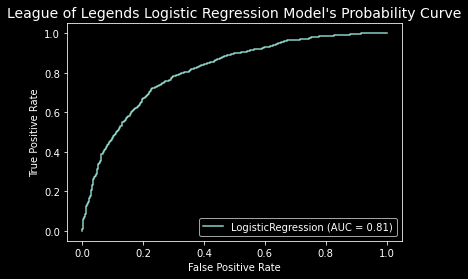

<Figure size 864x720 with 0 Axes>

In [50]:
# Train and create the Logistic Regression model
LoL_Logic = LogisticRegression(random_state=5, max_iter = 1000).fit(X_train, y_train.values.ravel())

# Store model predictions on X_test
ylog_pred = LoL_Logic.predict(X_test)

# Print the model's accuracy at predicting y_test
print("Accuracy:",accuracy_score(y_test, ylog_pred))

# Plot the model's probability curve
plot_roc_curve(LoL_Logic, X_test, y_test)
plt.title("League of Legends Logistic Regression Model's Probability Curve", fontsize = 14) 
plt.figure(figsize=(12,10), linewidth = .8)
plt.style.use('dark_background')

# Remove comment to save chart as .png
#plt.savefig("LoL Logistic Regression Probability Curve")

# Display the chart
plt.show()

The logistic regression model's probability curve also known as the Receiver Operating Curve (ROC) provides the  diagnostic ability of the binary model by comparing the True Positive Rate against the False Positive Rate.  Models that give curves closer to the top-left corner with a larger Area Under the Curve (AUC) indicate a better performance.

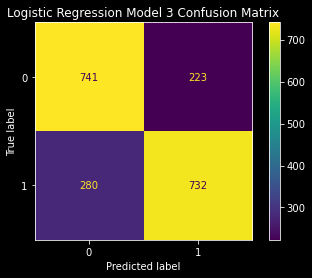

In [51]:
# Create and plot confusion matrix of the LoL_Logic model's results on test data.
LoL_Log_ConfusionMatrix = ConfusionMatrixDisplay(confusion_matrix(y_test, ylog_pred)).plot()
plt.title("Logistic Regression Model 3 Confusion Matrix")
# Remove comment to save Confusion Matrix as .png
# plt.savefig("Ratio Logistic Confusion Matrix")
LoL_Log_ConfusionMatrix


In [52]:
# Print the classification results of the LoL_Logic model
LoL_Log_report = classification_report(y_test, ylog_pred)
print(LoL_Log_report)

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       964
           1       0.77      0.72      0.74      1012

    accuracy                           0.75      1976
   macro avg       0.75      0.75      0.75      1976
weighted avg       0.75      0.75      0.75      1976



Collect the coefficient and intercept values for the model. 

In [53]:
# Get the coefficients and intercept values for LoL_Logic model
#   Store the variable names
CoeffNames = X_variables.columns
#   Store the coefficient values as a dataframe and provide column names
Coefficients = pd.DataFrame(LoL_Logic.coef_, columns = CoeffNames)
#   Add the intercept to the data frame
Coefficients["Intercept"] = LoL_Logic.intercept_
#   Rename index as 'Coefficients'
Coefficients = Coefficients.rename(index = {0: 'Coefficients'})

# Display transposed Coefficients data frame 
Coefficients.T

,Coefficients
Assist Ratio,0.028852
Elite Monster Ratio,0.116269
Dragon Ratio,0.287910
Towers Destroyed Ratio,-0.140175
Gold Ratio,7.496711
Avg Level Ratio,2.924256
Minions Killed Ratio,0.128683
Jungle Minions Killed Ratio,0.257951
Intercept,-11.250047


The coefficient values suggest Gold Ratio and Avg Level Ratio are the two most impactful factors in determining a win or loss outcome.

Calculate the p-values for the coefficients.

In [54]:
# Calculate the coefficient p_values using chi square
#   Import chi square module
from sklearn.feature_selection import chi2

# calculate the p_values
score,pvalues = chi2(X_train,y_train)

#Store values as a data frame and use X_variables as the index
pvalues = pd.DataFrame(pvalues)
pvalues = pvalues.set_index(X_variables.columns)
pvalues = pvalues.rename(columns ={0 : 'p-values'})

# Print...
pvalues

,p-values
Assist Ratio,1.506990e-280
Elite Monster Ratio,3.880073e-56
Dragon Ratio,5.359450e-36
Towers Destroyed Ratio,4.491284e-04
Gold Ratio,9.534200e-12
Avg Level Ratio,4.788482e-03
Minions Killed Ratio,4.209752e-05
Jungle Minions Killed Ratio,2.556046e-06


P-values are used as a null hypothesis significance test that states that there is no underlying relationship between two variables (independent and dependent).  The lower the p-value the higher the significance that two variables are related.  Based on the above p-values which are all less than 0.001, these independent variables are statistically significant to the target variable.

#### The Logistic Regression Model 3 Confusion Matrix provides an overall accuracy of 75% at predicting the test data based on 8 independent variables that have a high statistical significance to the target variable.

### DECISION TREE CLASSIFIER MODEL

Decision Tree Classifier models are a type of supervised machine learning that predicts an outcome as a discrete classification, which in this case is a "win" or a "loss". Decision Tree models are trained by continuously splitting data according to certain parameters

In [55]:
# Store the Ratio variables as the x/independent variables for model
#   Exclude Kills Ratio, CS Per Min Ratio and Gold Per Min Ratiodue to strong correlations with other variables.
#   Exclude First Blood which had no correlation to target.
X_attributes = LoL_df.iloc[:,42:54]
X_attributes.head()

,Wards Placed Ratio,Wards Destroyed Ratio,Assist Ratio,Elite Monster Ratio,Dragon Ratio,Herald Ratio,Towers Destroyed Ratio,Gold Ratio,Avg Level Ratio,Experience Ratio,Minions Killed Ratio,Jungle Minions Killed Ratio
0,1.812500,0.428571,1.333333,1.00,1.0,1.0,1.0,1.038812,0.970588,0.999531,0.989848,0.654545
1,1.000000,1.000000,2.000000,0.33,0.5,0.5,0.5,0.834960,0.970588,0.932733,0.725000,0.826923
2,1.000000,0.250000,0.333333,2.00,2.0,1.0,1.0,0.932196,0.941176,0.940130,0.916256,1.642857
3,2.750000,0.666667,0.545455,2.00,1.0,2.0,1.0,0.919833,1.000000,0.999610,0.855319,1.170213
4,4.222222,1.666667,0.875000,0.50,0.5,1.0,1.0,0.942312,1.000000,1.012559,0.933333,0.850746


Split the data into train and test data sets using the X_attributes shown above as independent variables  with "blueWins" as the dependent variable.

In [56]:
# Create a train and test sets for our models
#  Define X and y
X = X_attributes
y = LoL_df[["blueWins"]]

# Split the data into train and test sets with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 23)

#### Train and test the Decision Tree Classifier model.  

In [57]:
# Create Decision Tree Classifier model
#  Prune tree at 20 max_leaf_nodes ('best results' based on 
#  multiple attempts using varying values for max_leaf_nodes)
LoL_Tree = DecisionTreeClassifier(random_state = 23, max_leaf_nodes = 20, criterion = "entropy")

LoL_Tree.fit(X_train, y_train)
ytree_pred = LoL_Tree.predict(X_test)
print("Accuracy:",accuracy_score(y_test, ytree_pred))

Accuracy: 0.7322874493927125


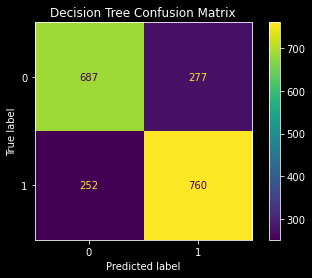

In [58]:
# Plot the confusion matrix with title
LoL_Tree_ConfusionMatrix = ConfusionMatrixDisplay(confusion_matrix(y_test, ytree_pred)).plot()
plt.title("Decision Tree Confusion Matrix")
# Remove comment below to save chart as .png
#plt.savefig("Decision Tree Confusion Matrix")
LoL_Tree_ConfusionMatrix

In [59]:
# Print the classification results of the LoL_Tree model
LoL_Tree_report = classification_report(y_test, ytree_pred)
print(LoL_Tree_report)

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       964
           1       0.73      0.75      0.74      1012

    accuracy                           0.73      1976
   macro avg       0.73      0.73      0.73      1976
weighted avg       0.73      0.73      0.73      1976



#### Plot a visual representation of the LoL_Tree model

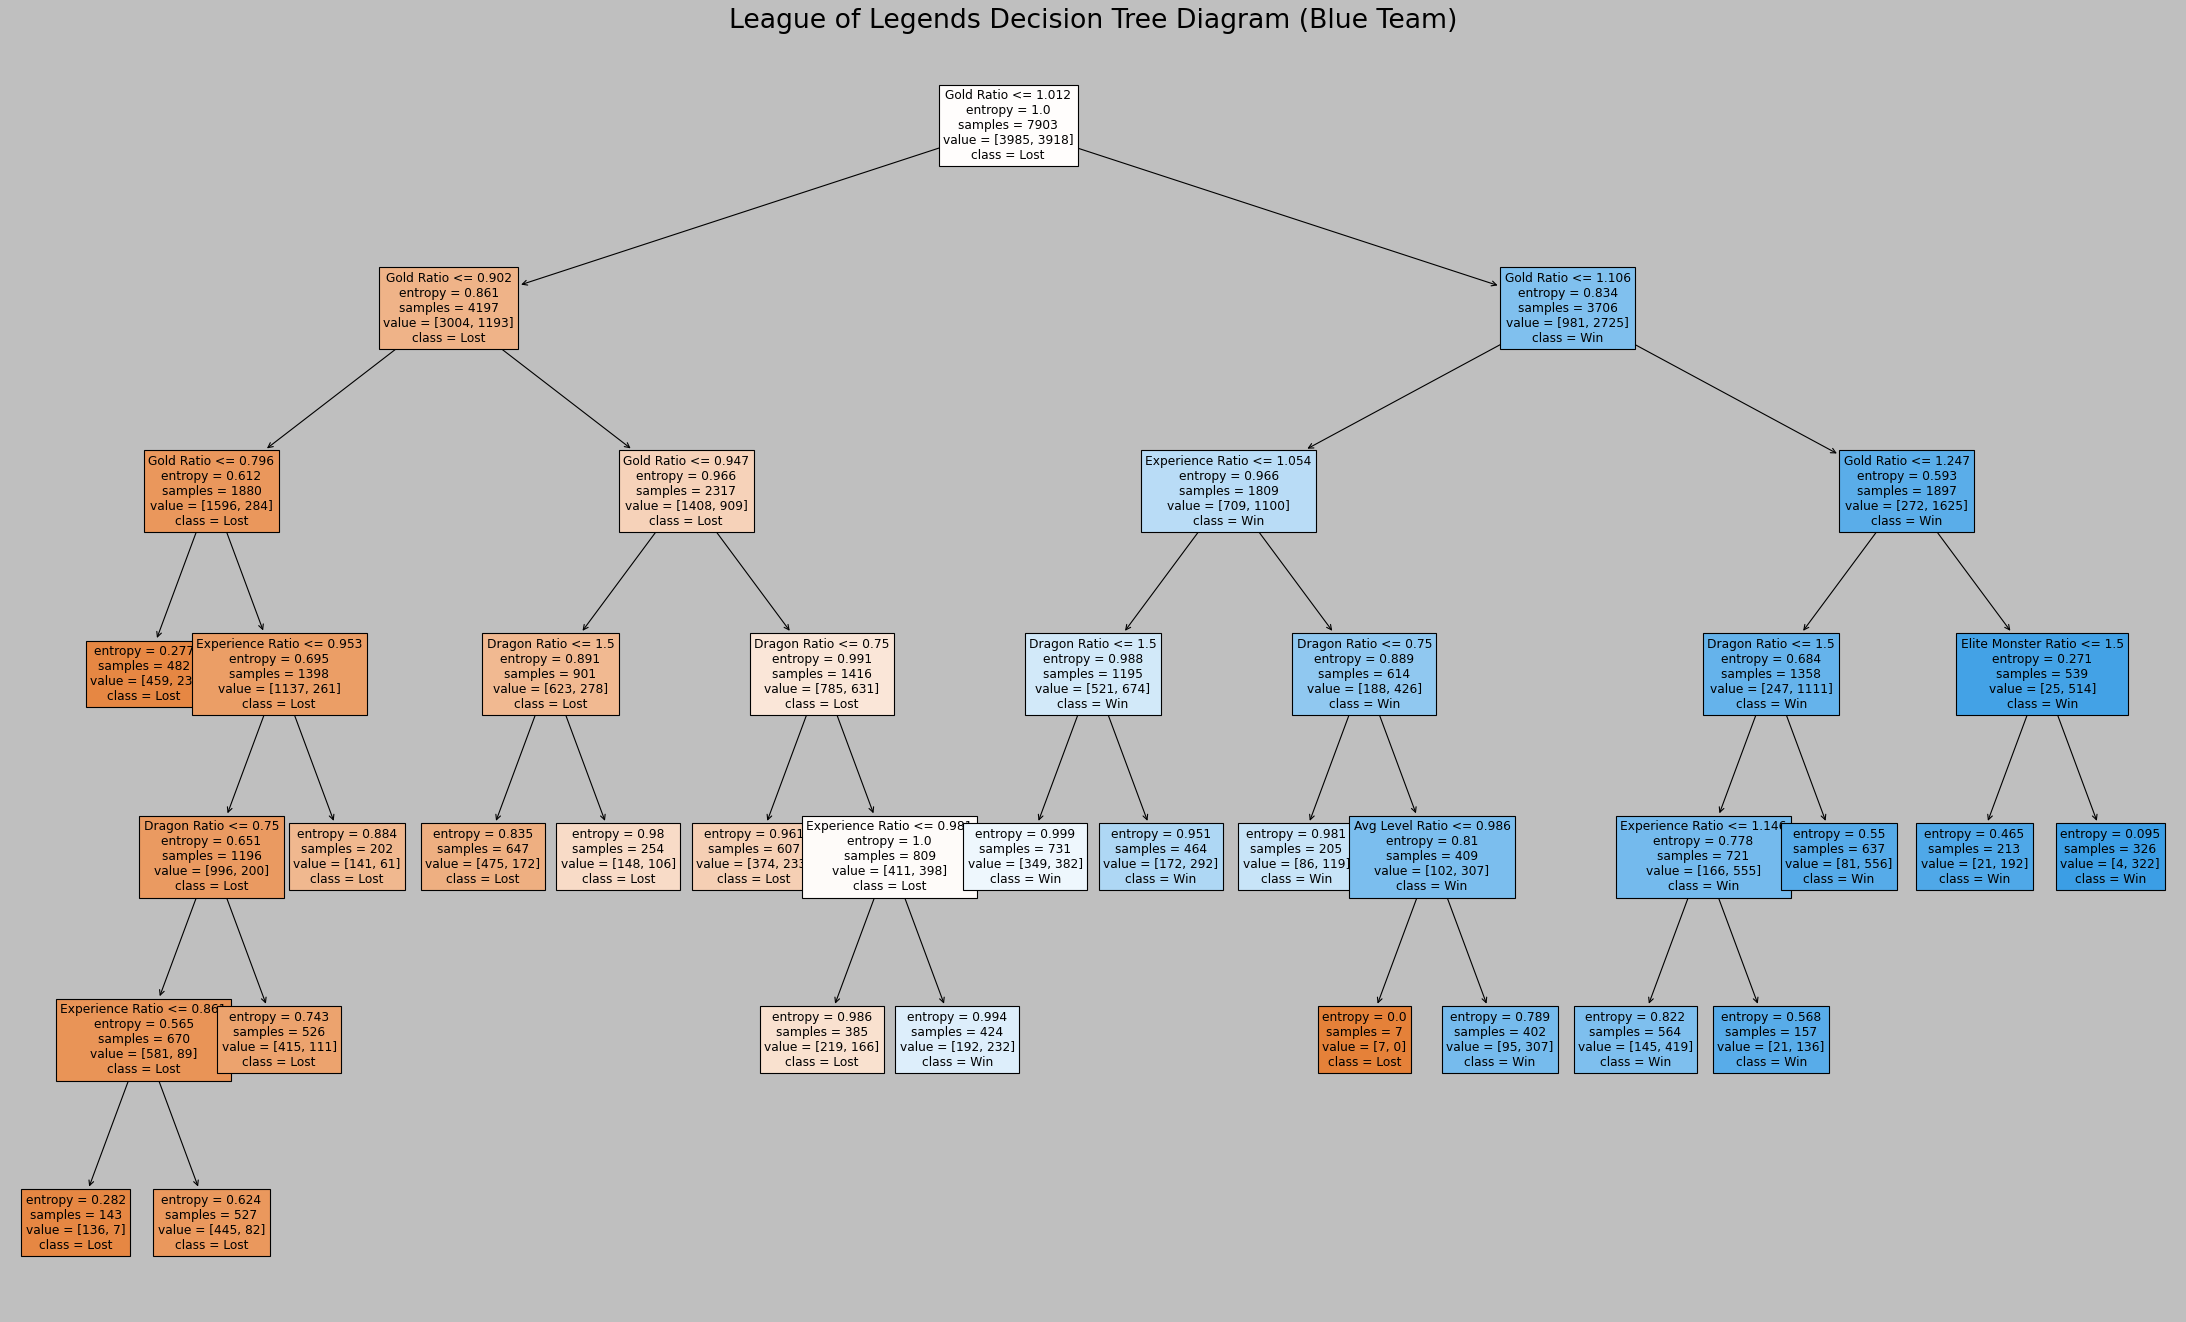

In [60]:
# Define the feature names and class names for Decision Tree
X_features = X_attributes.columns
Y_features = ["Lost", "Win"]

# Visualize the LoL_Tree model
plt.style.use('classic')
fig = plt.figure(figsize=(35,20))
LoL_Tree_Diagram = tree.plot_tree(LoL_Tree,feature_names=X_features,class_names = Y_features,
                  filled=True, fontsize = 11)
plt.title("League of Legends Decision Tree Diagram (Blue Team)", fontsize = 24)

# Remove comment to save figure as .png
plt.savefig("League of Legends Decision Tree Diagram")

plt.show()

#### The Decision Tree Model Confusion Matrix provides an overall accuracy of 73% at predicting the test data. 
Based on visualized tree results the variables with the most impact at determining a match's win/loss outcome at the 10-minute mark of the game are: Gold Ratio, Experience Ratio, Dragon Ratio, Elite Monster Ratio and Avg. Level Ratio. 

Entropy is the measure of disorder or uncertainty in which higher values indicate higher levels of uncertainty. In a decision tree, leaf nodes with high entropy values suggest less certainty in its classification outcome. 

## Conclusion

Our hypothesis for this analysis was that the win-loss outcome of a League of Legends game among DIAMOND/MASTER ranked players can be predicted based on key performance indicators (KPI) taken at the 10-minute mark of a match. Through the use of descriptive analysis, KPI's were successfully identified for our predictive models. Supervised machine learning algorithms logistic regression and decision tree classification were then employed.  A summary of the predictive models' accuracy are provided below:

* Logistic Regression Model 1: Single Team Stats -- Accuracy = 71%
* Logistic Regression Model 2: Diff Blue and Red Stats – Accuracy = 72%
* Logistic Regression Model 3: Blue/Red Stat Ratios – Accuracy = 75%
* Decision Tree Classification Model -- Accuracy = 73%

Key Insights gained from the analysis revealed 3 key performance indicators:

* Acquiring more Gold than opponent is one of the strongest factors to winning.
* Achieving higher Avg. Levels than opponent increases probability of winning. 
* More Monster and Minion kills than opponent at beginning of the game increases the odds of winning 

Achieving all 3 of the above indicators within the first 10 minutes of a game will greatly secure a match win.

### Success Achieved:  
We defined our analysis to be a success if our predictive models had a greater than 70% accuracy at predicting match outcomes.  We met this objective with all 4 models achieving greater than a 70% accuracy at predicting League of Legend match outcomes between Diamond and Master player team stats at the 10 minute mark of a match. 